# Part 1- Regression 

Code example to predict prices of Airbnb vacation rentals, using scikit-learn on Spark.

The Jupyter notebook icontains examples to run regression estimators on the Inside Airbnb listings dataset from Denver. The target variable is the price of the listing. 

The link to Dataset-
http://insideairbnb.com/get-the-data.html  (Search for Denver)
This dataset was scraped on 30th September 2019 and has the acytual listings with exact locations, dates and price .

In this project, we are trying to predict the price of a listing by considering all the mentioned details

In [1]:
#Import all the libraries

import pandas as pd
import numpy as np
import descartes
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import os
import statsmodels
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.special import boxcox1p
from math import radians, cos, sin, asin, sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import exp
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from  sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from  sklearn.linear_model import Ridge


from sklearn.model_selection import cross_val_score
from sklearn import linear_model
# for pre-0.18 versions of scikit, use:
from sklearn.cross_validation import cross_val_score

from sklearn.linear_model import SGDRegressor

from sklearn.neighbors import KNeighborsRegressor

from tqdm import tqdm
from sklearn.svm import SVR

from tqdm import tqdm
from sklearn.svm import SVR


%matplotlib inline

C:\Users\vikas\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\vikas\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Change the working directory to Airbnb folder
os.chdir("C://Users//vikas//Desktop//AirBnb")


In [3]:
#Read the Listings data for Denver

listings=pd.read_csv("listings.csv")
listings.head()

id                       listing_url     scrape_id last_scraped  \
0  360  https://www.airbnb.com/rooms/360  2.019060e+13    6/29/2019   
1  364  https://www.airbnb.com/rooms/364  2.019060e+13    6/29/2019   
2  590  https://www.airbnb.com/rooms/590  2.019060e+13    6/29/2019   
3  592  https://www.airbnb.com/rooms/592  2.019060e+13    6/29/2019   
4  686  https://www.airbnb.com/rooms/686  2.019060e+13    6/29/2019   

                                          name  \
0  LoHi Secret garden at the Chickadee Cottage   
1          Lodo / RiNo LOFT  via airport train   
2            Comfortable  - and a great value!   
3                                      private   
4            Alexandra's Uptown Queen Bed Room   

                                             summary  \
0  Come enjoy our oasis is the city and stay at o...   
1  Modern 1,000 square foot loft in the heart of ...   
2  Large guest room in my home, where I also live...   
3  This room is in the basement.  It does not hav...   
4  Thank you for visiting my Queen Bed Room site!...   

                                               space  \
0  Chickadee Cottage is the largest of our guest ...   
1  BRAND NEW FOR 2016 -  April 22, 2016 - the air...   
2  I have been enjoying welcoming many wonderful ...   
3  This is a basement room.  You can sometimes he...   
4  Thank you for checking out my Bed and Breakfas...   

                                         description experiences_offered  \
0  Come enjoy our oasis is the city and stay at o...                none   
1  Modern 1,000 square foot loft in the heart of ...                none   
2  Large guest room in my home, where I also live...                none   
3  This room is in the basement.  It does not hav...                none   
4  Thank you for visiting my Queen Bed Room site!...                none   

                               neighborhood_overview        ...          \
0  those who are interested in our local brews - ...        ...           
1  Ten brewpubs within walking distance, two grea...        ...           
2  I love the diversity of my neighborhood and it...        ...           
3                                                NaN        ...           
4  I love my Uptown neighborhood, which is within...        ...           

  instant_bookable is_business_travel_ready          cancellation_policy  \
0                t                        f                     moderate   
1                f                        f  strict_14_with_grace_period   
2                f                        f                     flexible   
3                f                        f                     flexible   
4                t                        f                     moderate   

  require_guest_profile_picture require_guest_phone_verification  \
0                             t                                t   
1                             f                                f   
2                             f                                f   
3                             f                                f   
4                             f                                f   

   calculated_host_listings_count  \
0                               3   
1                               1   
2                               2   
3                               2   
4                               2   

   calculated_host_listings_count_entire_homes  \
0                                            3   
1                                            1   
2                                            0   
3                                            0   
4                                            0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            2   
3                                            2   
4                                            2   

   

In [4]:
print(listings.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)


In [5]:
listings.shape

(4511, 106)

# Data Cleaning and Exploration

In [6]:
# Clean numeric fields
num_feats = ['cleaning_fee', 'extra_people', 'price']
listings[num_feats] = listings[num_feats].replace('[\$,]', '', regex=True) #Remove $ sign before the prices
listings[num_feats] = listings[num_feats].apply(pd.to_numeric, errors='coerce') #Converting the prce data to numeric
print("Dataset has {} rows, {} columns.".format(*listings.shape)) #Shape of the Dataset

Dataset has 4511 rows, 106 columns.


In [7]:
#Sum of NA values in the dataset (Missing values)

listings.isnull().sum()[listings.isnull().sum()>0]

summary                           73
space                            652
description                       35
neighborhood_overview            828
notes                           1602
transit                          946
access                          1059
interaction                      926
house_rules                     1110
thumbnail_url                   4511
medium_url                      4511
xl_picture_url                  4511
host_name                          2
host_since                         2
host_location                      8
host_about                      1471
host_response_time               522
host_response_rate               522
host_acceptance_rate            4511
host_is_superhost                  2
host_thumbnail_url                 2
host_picture_url                   2
host_neighbourhood               542
host_listings_count                2
`                                  2
``                                 2
host_identity_verified             2
n

In [8]:
#Different Type of Rooms available in Denver
roomType_DF=listings.groupby('room_type').id.count()
roomType_DF=roomType_DF.reset_index()
roomType_DF=roomType_DF.rename(columns={'id':'number_Of_Listings'})
roomType_DF

room_type  number_Of_Listings
0  Entire home/apt                3300
1     Private room                1113
2      Shared room                  98

As we can see, most of the listings are Entire home/Apt or Private Rooms.

In [9]:
# Create a pieplot

roomType_DF.plot.pie(y='number_Of_Listings',fontsize = 8, autopct = '%.2f',labels=(roomType_DF['room_type']))

my_circle=plt.Circle( (0,0), 0.7, color='white') # add a circle at the center
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Room Type : A donut')
plt.show()

In [10]:
# the number of entries with 0 'number_of_reviews' which do not a NaN for 'reviews_per_month'
len(listings[(listings.number_of_reviews == 0) & (pd.isnull(listings.number_of_reviews) == False)
       & (pd.isnull(listings.reviews_per_month) == False)].index)

0

In [11]:
# the number of entries with at least 1 'number_of_reviews' which have a NaN for 'reviews_per_month'
len(listings[(listings.number_of_reviews != 0) & (pd.isnull(listings.number_of_reviews) == False)
       & (pd.isnull(listings.reviews_per_month) == True)].index)

0

In [12]:
# so we need to do some cleaning.

# first fixup 'reviews_per_month' where there are no reviews
listings['reviews_per_month'].fillna(listings['reviews_per_month'].mean(), inplace=True)

In [13]:
# remove the $ from the price and convert to float
listings['price'] = listings['price'].replace('[\$,)]','',  \
        regex=True).replace('[(]','-', regex=True).astype(float)
listings.price.head(5)

0    140.0
1    179.0
2     61.0
3     42.0
4     70.0
Name: price, dtype: float64

Text(0, 0.5, 'Number of listings')

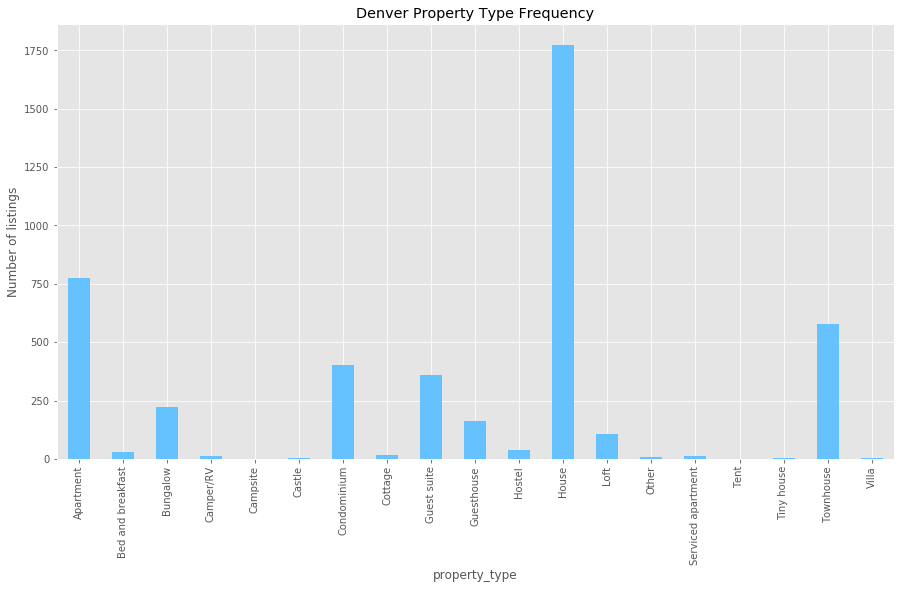

In [14]:

plt.style.use('ggplot')

propertytype_DF = listings.groupby('property_type').id.count()
propertytype_DF= propertytype_DF.reset_index()
propertytype_DF=propertytype_DF.rename(columns={'id':'Number_Of_Listings'})

objects = propertytype_DF['property_type']
y_pos = propertytype_DF['Number_Of_Listings']

propertytype_DF.plot(kind='bar', 
           x='property_type',
           y='Number_Of_Listings',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'Denver Property Type Frequency', 
           legend = False)
plt.ylabel('Property Type')
plt.ylabel('Number of listings')

Almost half of the listings are Houses. We also have apartments and condominiums listed. 

In [15]:
listings.groupby('neighbourhood_cleansed')['availability_365'].describe()

count        mean         std   min     25%  \
neighbourhood_cleansed                                                      
Athmar Park                    21.0  105.190476  120.914275   0.0   19.00   
Auraria                         5.0  168.800000  148.063162   8.0   20.00   
Baker                         109.0  124.752294  117.573157   0.0   20.00   
Barnum                         18.0  120.277778  122.028350   0.0   20.25   
Barnum West                    23.0  269.304348  120.461022  15.0  154.00   
Bear Valley                    10.0  161.200000  130.616317   0.0   69.75   
Belcaro                        14.0  103.714286  112.447204   0.0   21.25   
Berkeley                      126.0  132.373016  108.721496   0.0   39.00   
CBD                            71.0  204.436620  119.655784   0.0   89.00   
Capitol Hill                  205.0  117.375610  122.740402   0.0    0.00   
Chaffee Park                   34.0   92.058824  102.442871   0.0    0.25   
Cheesman Park                  86.0  120.686047  122.610647   0.0    0.25   
Cherry Creek                   33.0  135.181818  123.648053   0.0   24.00   
City Park                      42.0   77.928571  106.768816   0.0    1.00   
City Park West                111.0  123.936937  108.946632   0.0   25.50   
Civic Center                   39.0  121.923077  105.142105   0.0   72.50   
Clayton                        71.0  127.366197  112.650057   0.0   32.00   
Cole                           81.0  114.432099  115.689772   0.0    7.00   
College View - South Platte    11.0  121.818182  125.912524   0.0   17.50   
Congress Park                 104.0  111.913462  116.267277   0.0    4.00   
Cory - Merrill                 19.0   95.368421   98.556927   0.0   10.00   
Country Club                   12.0  169.250000  146.753426   0.0   24.75   
DIA                             9.0  230.111111  128.295990  12.0  156.00   
East Colfax                    26.0  110.692308  125.008406   0.0    5.00   
Elyria Swansea                  8.0   93.750000   65.114734   0.0   58.25   
Five Points                   366.0  143.923497  131.612527   0.0   22.25   
Fort Logan                      5.0  237.200000  122.705746  90.0  180.00   
Gateway - Green Valley Ranch  124.0  183.862903  132.496070   0.0   59.75   
Globeville                     15.0   81.733333   94.271998   0.0    0.00   
Goldsmith                      13.0  103.538462  117.499373   0.0    0.00   
...                             ...         ...         ...   ...     ...   
Northeast Park Hill            52.0  103.153846  118.380474   0.0    2.25   
Overland                       22.0  213.590909  126.200769   0.0   89.50   
Platt Park                     73.0  130.383562  124.241547   0.0   30.00   
Regis                          38.0  101.105263  105.403418   0.0   11.25   
Rosedale                       24.0  158.791667  115.568906   0.0   60.50   
Ruby Hill                      29.0  108.517241   87.284682   0.0   46.00   
Skyland                        45.0   92.066667  103.858383   0.0   13.00   
Sloan Lake                    116.0  106.413793  108.235096   0.0   16.75   
South Park Hill                44.0  133.136364  117.459066   0.0   41.75   
Southmoor Park                 11.0   95.545455  127.736732   0.0   12.50   
Speer                         165.0  113.751515  119.645432   0.0    8.00   
Stapleton                      95.0   99.547368  121.220282   0.0    0.00   
Sun Valley                      4.0  144.500000  102.080034  51.0   92.25   
Sunnyside                     152.0  117.486842  110.808049   0.0   22.00   
Union Station                 140.0  101.514286  116.185877   0.0    4.75   
University                     46.0  122.956522   99.122137   0.0   57.25   
University Hills               27.0   97.888889  107.418425   0.0   12.50   
University Park                27.0  107.407407  118.679354   0.0    0.00   
Valverde                       22.0  109.045455   97.158916   0.0   57.25   
Villa Park                

Location and neighborhood are the two main factors one chooses as a place to stay. Above table shows the mean, min and max nprice distribution for neighboorhoods in Denver.
The neighborhoods near downtown Denver has more listings as it is the center for many events and activities in the city. Hence, I would like to focus our analysis and prediction on listings close to Denver Downtown.

In [16]:
prop = listings.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=100]
prop = prop.drop(columns=['total'])

prop.plot(kind='barh',stacked=True, color = ["r","b","g"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Property types in Denver', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

Above plot shows different property types in Denver and what kind of housing (shared/ entire home,etc) are available.

In [17]:
#Price Analysis/ Distribution

In [18]:
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(listings['price'], ax=axes[0])
sns.distplot(np.log1p(listings['price']), ax=axes[1])
axes[1].set_xlabel('log(1+price)')
sm.qqplot(np.log1p(listings['price']), stats.norm, fit=True, line='45', ax=axes[2]);

C:\Users\vikas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


I notice that the target has a highly skewed distribution. This can cause problems for machine learning algorithms such as linear regression. A log transformation and removal of outliers makes the distribution look much closer to normal.

In [19]:
listings = listings[np.log1p(listings['price']) < 8]
listings = listings[np.log1p(listings['price']) > 3]

In [20]:
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(listings['price'], ax=axes[0])
sns.distplot(np.log1p(listings['price']), ax=axes[1])
axes[1].set_xlabel('log(1+price)')
sm.qqplot(np.log1p(listings['price']), stats.norm, fit=True, line='45', ax=axes[2]);

C:\Users\vikas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


In [ ]:
listings['price'] = np.log1p(listings['price'])

#Finding a good host


At Airbnb you can get the status "Superhost"

From Airbnb:

As a Superhost, you’ll have more visibility, earning potential, and exclusive rewards. It's our way of saying thank you for your outstanding hospitality.
How to become a Superhost: Every 3 months, we check if you meet the following criteria. If you do, you'll earn or keep your Superhost status.
Superhosts have a 4.8 or higher average overall rating based on reviews from at least 50% of their Airbnb guests in the past year.
Superhosts have hosted at least 10 stays in the past year or, if they host longer-term reservations, 100 nights over at least 3 stays.
Superhosts have no cancellations in the past year, unless there were extenuating circumstances.
Superhosts respond to 90% of new messages within 24 hours.
Below, we can see that almost half portion of the listings in Denver do have a host who is Superhost

In [21]:
listings['host_is_superhost'] = listings['host_is_superhost'].replace({"t": "True", "f": "False"})


In [22]:
#Room Type
hostType=listings.groupby('host_is_superhost').id.count()
hostType=hostType.reset_index()
hostType=hostType.rename(columns={'id':'number_Of_Listings'})
hostType

host_is_superhost  number_Of_Listings
0             False                2327
1              True                2143

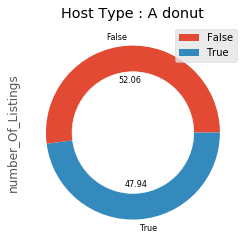

In [23]:
#Host Type
# Create a pieplot
hostType.plot.pie(y='number_Of_Listings',fontsize = 8, autopct = '%.2f',labels=(hostType['host_is_superhost']))
#plt.show()
 
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Host Type : A donut')


plt.show()


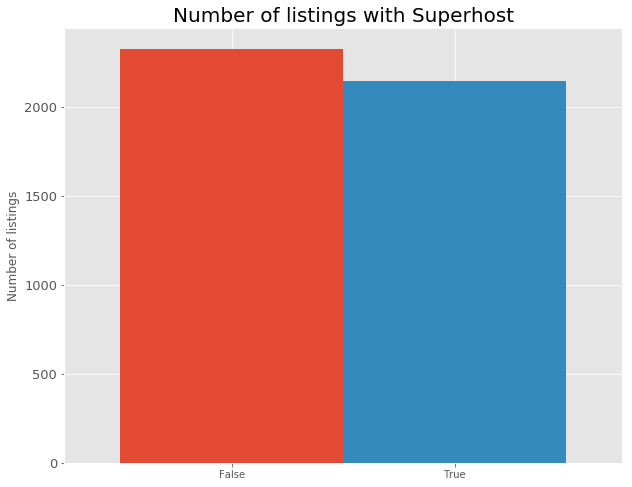

In [24]:
feq=listings['host_is_superhost'].value_counts()
feq.plot.bar(figsize=(10, 8), width=1, rot=0)
plt.title("Number of listings with Superhost", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.show()

In [25]:
hostType=listings.groupby('host_is_superhost')
hostType=hostType.number_of_reviews.mean()
hostType.index.rename(['Normal Host', 'Super Host'], inplace=True)
#hostType.reindex(['Normal Host', 'Super Host'])

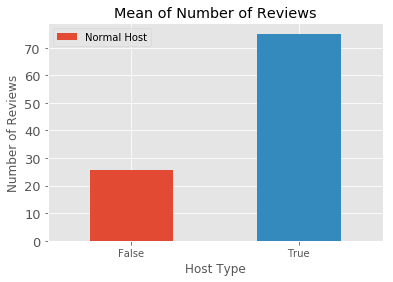

			0 --> Normal Host 	1 --> Super Host
Mean number of reviews: 25.51			75.0


In [26]:
ax = hostType.plot.bar(x='Host Type', y='Number of Reviews (Mean)', rot=0)
host=['Normal Host','Super Host']
#ax.legend(host)
plt.ylabel('Number of Reviews')
plt.xlabel('Host Type')
plt.title('Mean of Number of Reviews')
plt.legend(host)


plt.show()

print('\t\t\t0 --> Normal Host \t1 --> Super Host')
print('Mean number of reviews: {}\t\t\t{}'.format(round(hostType[0],2), round(hostType[1]),2))

Superhosts have more number of reviews. Shows how many people prefer superhosts while booking a listing.

In [27]:
hostType=listings.groupby('host_is_superhost')
hostType=hostType.review_scores_rating.mean()
hostType.index.rename(['Normal Host', 'Super Host'], inplace=True)
#hostType.reindex(['Normal Host', 'Super Host'])

In [28]:
hostType.unique()

array([95.76793033, 98.10782443])

If I were to book accomomodation, I would not necessarily look for a superhost. Actually, I would be afraid that I would pay too much as superhost will likely increase their prices. However, I would also not want to host that responds badly, or cancels a lot.

As we can see, just over 52% of the 4509 listings have at least 10 reviews and respond to at least 90% of the new messages. I would consider those hosts "proven" good responders (which does not mean that a listing with less than 10 reviews cannot have good responding hosts; it is just not proven yet). Also, there are very few listings with hosts not replying to new messages within 24 hours.

In [29]:
listings['host_response_rate'] = pd.to_numeric(listings['host_response_rate'].str.strip('%'))
listings10 = listings[listings['number_of_reviews']>=10]


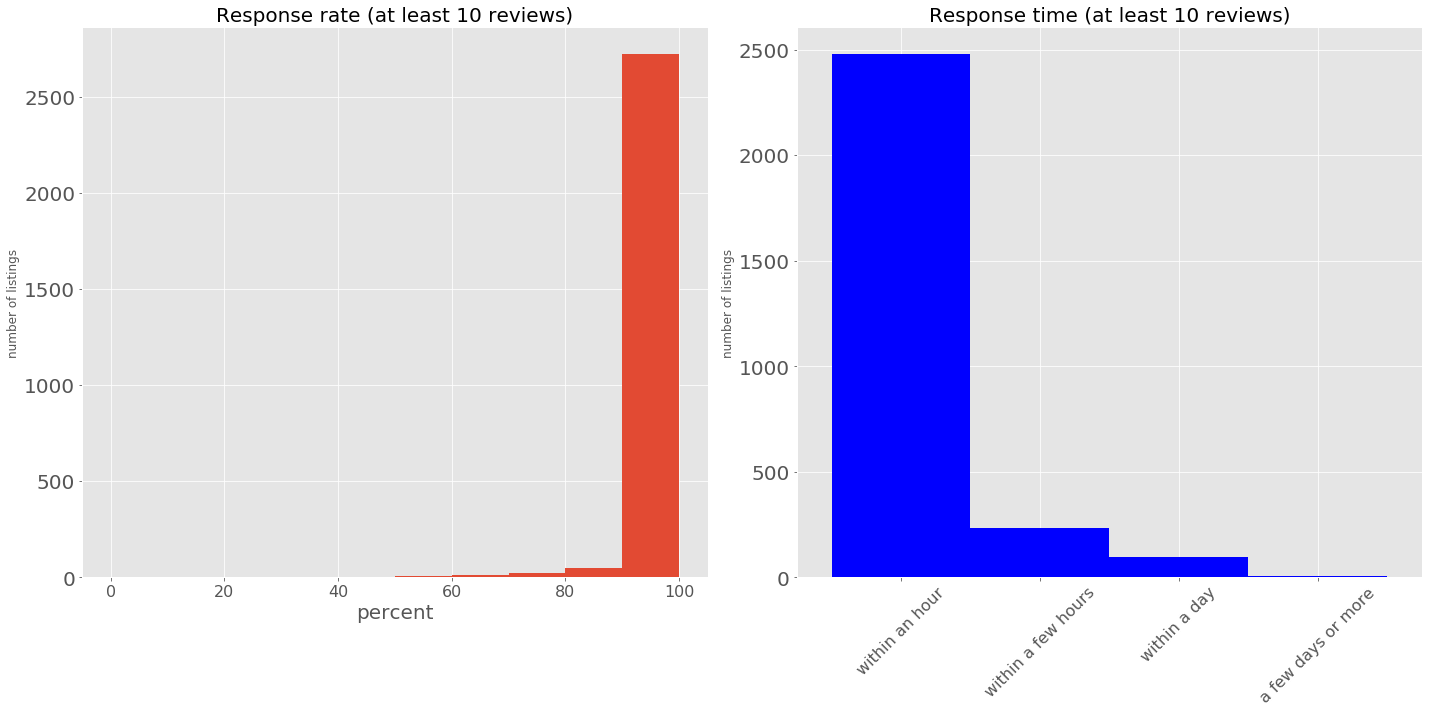

In [30]:
fig = plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)

ax1 = fig.add_subplot(121)
feq1 = listings10['host_response_rate'].dropna()
ax1= plt.hist(feq1)
plt.title("Response rate (at least 10 reviews)", fontsize=20)
plt.ylabel("number of listings")
plt.xlabel("percent", fontsize=20)

ax2 = fig.add_subplot(122)
feq2 = listings10['host_response_time'].value_counts()
ax2=feq2.plot.bar(color='b', width=1, rot=45)
plt.title("Response time (at least 10 reviews)", fontsize=20)
plt.ylabel("number of listings")

plt.tight_layout()
plt.show()

As we can see, the distribution is skewed and is a result of good hosts or presence of superhosts

In [31]:
#Neighborhood 
feq=listings['neighbourhood_cleansed'].value_counts().sort_values(ascending=True)


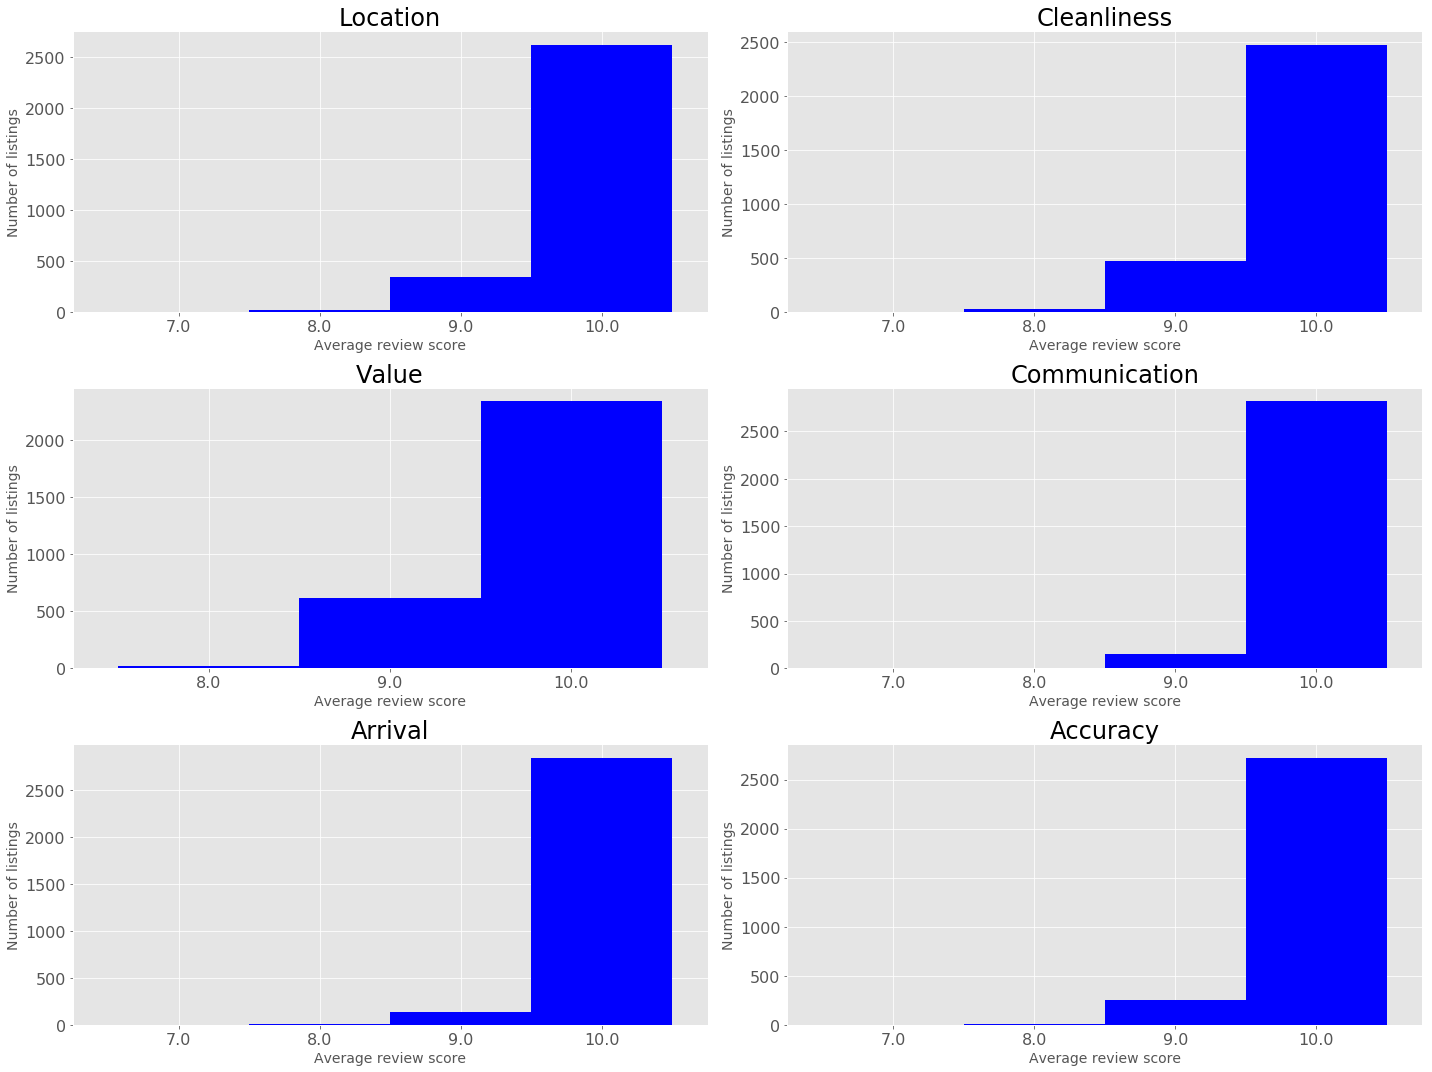

In [32]:
listings10 = listings[listings['number_of_reviews']>=10]

fig = plt.figure(figsize=(20,15))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

ax1 = fig.add_subplot(321)
feq=listings10['review_scores_location'].value_counts().sort_index()
ax1=feq.plot.bar(color='b', width=1, rot=0)
#ax1.tick_params(axis = 'both', labelsize = 16)
plt.title("Location", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax2 = fig.add_subplot(322)
feq=listings10['review_scores_cleanliness'].value_counts().sort_index()
ax2=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Cleanliness", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax3 = fig.add_subplot(323)
feq=listings10['review_scores_value'].value_counts().sort_index()
ax3=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Value", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax4 = fig.add_subplot(324)
feq=listings10['review_scores_communication'].value_counts().sort_index()
ax4=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Communication", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax5 = fig.add_subplot(325)
feq=listings10['review_scores_checkin'].value_counts().sort_index()
ax5=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Arrival", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax6 = fig.add_subplot(326)
feq=listings10['review_scores_accuracy'].value_counts().sort_index()
ax6=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Accuracy", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

plt.tight_layout()
plt.show()

Above plots show the scores for different attributes like communication, location, arrival, value, etc given by users. Most of the listings received very good feedback because of the services. Hence score does play a role for us to choose a listing or even determine the price

# Location Analysis

In [33]:
import seaborn as sns; sns.set()
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(listings['latitude'], ax=axes[0])
sns.distplot(listings['longitude'], ax=axes[1])
plt.scatter(x= listings['latitude'], y=listings['longitude'])
#sns.scatter(x= listings['latitude'], y=listings['longitude'])

C:\Users\vikas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Longitude and latitude are somewhat correlated with each other. This is because the locations of properties tend to come from clusters

In [34]:
from collections import Counter
nb_counts = Counter(listings.neighbourhood_cleansed)
nb_counts

Counter({'Athmar Park': 21,
         'Auraria': 5,
         'Baker': 109,
         'Barnum': 15,
         'Barnum West': 23,
         'Bear Valley': 10,
         'Belcaro': 14,
         'Berkeley': 124,
         'CBD': 71,
         'Capitol Hill': 205,
         'Chaffee Park': 34,
         'Cheesman Park': 86,
         'Cherry Creek': 33,
         'City Park': 42,
         'City Park West': 111,
         'Civic Center': 39,
         'Clayton': 71,
         'Cole': 81,
         'College View - South Platte': 11,
         'Congress Park': 104,
         'Cory - Merrill': 19,
         'Country Club': 12,
         'DIA': 9,
         'East Colfax': 26,
         'Elyria Swansea': 8,
         'Five Points': 366,
         'Fort Logan': 5,
         'Gateway - Green Valley Ranch': 124,
         'Globeville': 15,
         'Goldsmith': 13,
         'Hale': 46,
         'Hampden': 28,
         'Hampden South': 35,
         'Harvey Park': 13,
         'Harvey Park South': 7,
         'Highland': 299,

Text(0, 0.5, 'Count')

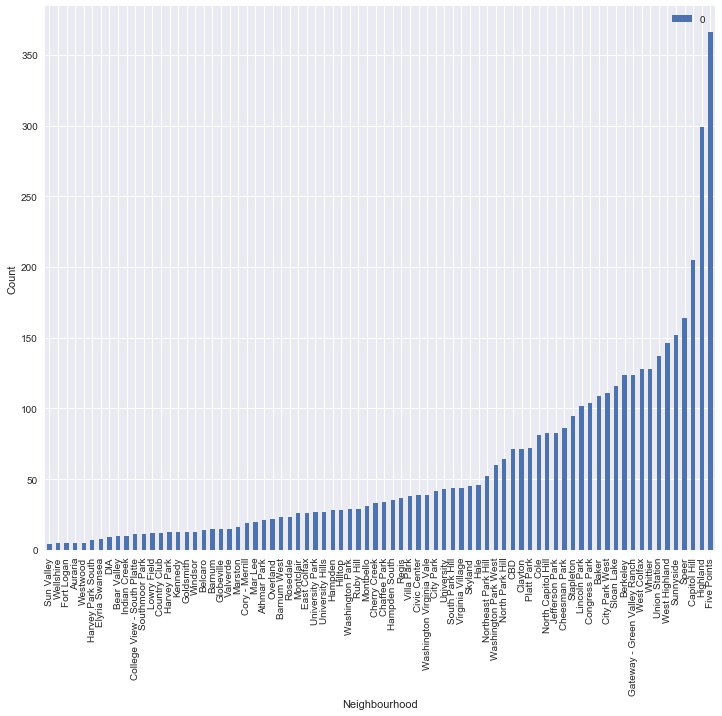

In [35]:


nb_counts = Counter(listings.neighbourhood_cleansed)
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
#tdf.set(xlabel='x axis', ylabel='y axis')
ax=tdf.plot(kind='bar',figsize=(12, 10), )
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Count')

Let's visualize listings on Google Maps using their Latitude and Longitude

In [36]:
import gmplot 
  
latitude_list = listings['latitude']
longitude_list = listings['longitude']
gmap = gmplot.GoogleMapPlotter(39.7392, -104.9903, 12)  #.from_geocode("Denver City") 

#gmap3 = gmplot.GoogleMapPlotter(30.3164945, 
#                                78.03219179999999, 13) 
  
# scatter method of map object  
# scatter points on the google map 
gmap.scatter( latitude_list, longitude_list, '#FF0000', 
                              size = 50, marker = False ) 
  
# Plot method Draw a line in 
# between given coordinates 
#gmap.plot(latitude_list, longitude_list)
        #   'cornflowerblue', edge_width = 0)
#var img = new google.maps.MarkerImage('6495ED.png')
#gmap.coloricon = "http://www.googlemapsmarkers.com/v1/%s/"
#gmap.marker(latitude_list, longitude_list,title="listings['price']")

gmap.draw('new.html')

In [37]:
from IPython.display import Image
Image("C:\\Users\\vikas\\Desktop\\AirBnb\\Listings_Denver.png")


As we can see, most of the listings are near the Downton area (Neighborhoods - Five Points, Highland, Speer, Capitol Hill, Sunnyside, West Highland and Union Station). 
* Above picture is a screenshot of the result from gmplot.

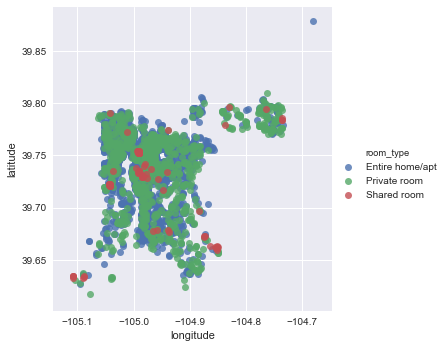

In [38]:
#sns.set(rc={'figure.figsize':(16,16)})
sns.lmplot(data=listings, x="longitude",y="latitude",fit_reg=False, hue='room_type', legend=True)
#plt.figure(figsize=(20,20))

#plt.title('Room type with respct to the locations')
plt.show()

Average daily price per neighbourhood
In order to compare "apples to apples" I have only selected the most common type of accommodation, 
which is accommodation for 2 persons. As expected, accommodation in the city centre is the most expensive. 

In [39]:
feq = listings[listings['accommodates']==2]
feq = feq.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(16, 14), color='b', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (USD)', fontsize=12)
plt.ylabel("Places")
plt.show()

Text(0.5, 1.0, 'Distribution of Cancellation policies listed')

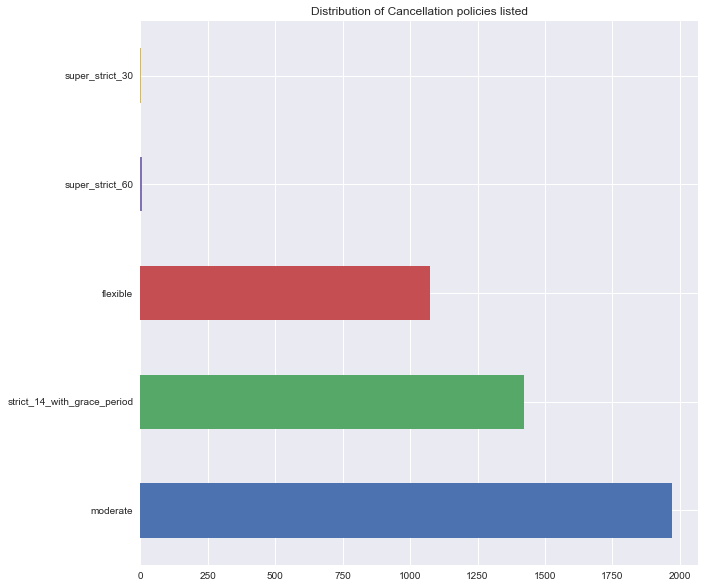

In [40]:
plt.figure(figsize=(10,10))
listings['cancellation_policy'].value_counts().plot(kind='barh')
plt.title('Distribution of Cancellation policies listed')

Moderate, Strict with 14 days grace and flexible policies dominate. This looks good for someone who is booking a listing in advance.

In [41]:
amenities=pd.read_csv('amenities.csv')
#amenities
#amenities_df=pd.DataFrame(amenities)
new_df=pd.DataFrame()
new_df=amenities
new_df=new_df.stack().reset_index()

In [42]:
amenities_final=new_df[0].value_counts()

Text(0.5, 1.0, 'Amenities and their distribution : A Countplot')

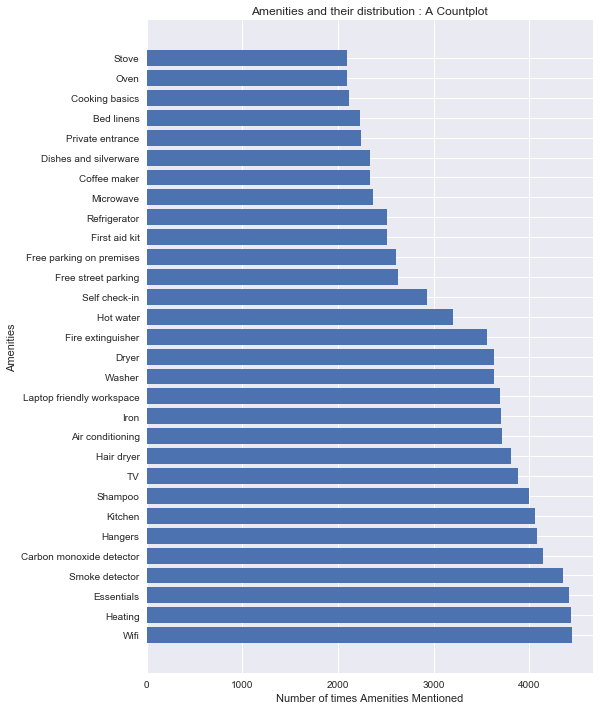

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,12))
plt.barh(amenities_final.index[:30], amenities_final[:30])
plt.xlabel('Number of times Amenities Mentioned')
plt.ylabel('Amenities')
plt.title('Amenities and their distribution : A Countplot')

In [44]:
print('Most common Amenity is {} with a count of {}'.format(amenities_final.index[0],amenities_final[:1][0]))

Most common Amenity is Wifi with a count of 4442


Amenities do play a role in pricing on Airbnb but more than the amenities, other features determine prices. I've tried to plot a distribution of amenities to show what are the common ameenities one can expect while booking a listing on Airbnb.

In [45]:
matrix_cols = ['accommodates', 'bedrooms', 'beds', 'minimum_nights', 'availability_365', 'number_of_reviews', 'price']

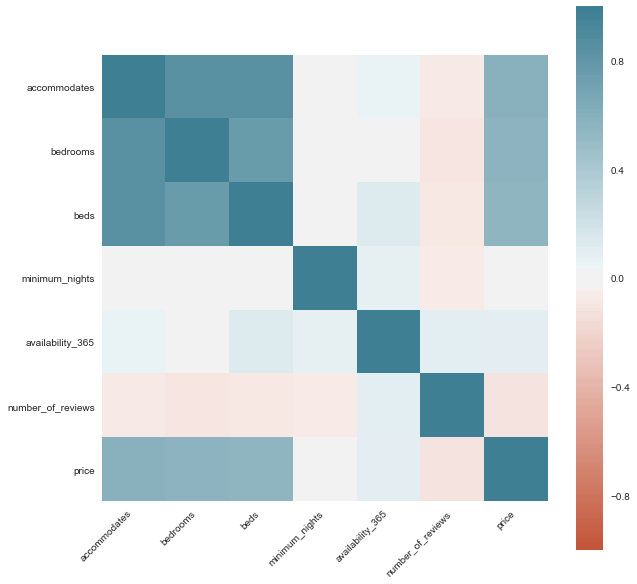

In [46]:
corr=listings[matrix_cols].corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Above plot is a correlation heatmap for numerical features. Some of them are little positively correlated - for example, Accomodates and beds have good correlation which makes sense. The more number of beds can accomodate more guests. Also, they are not highly correlated too - sometimes larger beds also results in more accomodation and hence we can say that type of the bed matters too. Similarly, t beds and bedrooms have a positive correlation. 
None of the features are highly or perfectly correlating with another feature and hence we won't face issues relating to high correlation.

In [47]:
listings.head()

id                       listing_url     scrape_id last_scraped  \
0  360  https://www.airbnb.com/rooms/360  2.019060e+13    6/29/2019   
1  364  https://www.airbnb.com/rooms/364  2.019060e+13    6/29/2019   
2  590  https://www.airbnb.com/rooms/590  2.019060e+13    6/29/2019   
3  592  https://www.airbnb.com/rooms/592  2.019060e+13    6/29/2019   
4  686  https://www.airbnb.com/rooms/686  2.019060e+13    6/29/2019   

                                          name  \
0  LoHi Secret garden at the Chickadee Cottage   
1          Lodo / RiNo LOFT  via airport train   
2            Comfortable  - and a great value!   
3                                      private   
4            Alexandra's Uptown Queen Bed Room   

                                             summary  \
0  Come enjoy our oasis is the city and stay at o...   
1  Modern 1,000 square foot loft in the heart of ...   
2  Large guest room in my home, where I also live...   
3  This room is in the basement.  It does not hav...   
4  Thank you for visiting my Queen Bed Room site!...   

                                               space  \
0  Chickadee Cottage is the largest of our guest ...   
1  BRAND NEW FOR 2016 -  April 22, 2016 - the air...   
2  I have been enjoying welcoming many wonderful ...   
3  This is a basement room.  You can sometimes he...   
4  Thank you for checking out my Bed and Breakfas...   

                                         description experiences_offered  \
0  Come enjoy our oasis is the city and stay at o...                none   
1  Modern 1,000 square foot loft in the heart of ...                none   
2  Large guest room in my home, where I also live...                none   
3  This room is in the basement.  It does not hav...                none   
4  Thank you for visiting my Queen Bed Room site!...                none   

                               neighborhood_overview        ...          \
0  those who are interested in our local brews - ...        ...           
1  Ten brewpubs within walking distance, two grea...        ...           
2  I love the diversity of my neighborhood and it...        ...           
3                                                NaN        ...           
4  I love my Uptown neighborhood, which is within...        ...           

  instant_bookable is_business_travel_ready          cancellation_policy  \
0                t                        f                     moderate   
1                f                        f  strict_14_with_grace_period   
2                f                        f                     flexible   
3                f                        f                     flexible   
4                t                        f                     moderate   

  require_guest_profile_picture require_guest_phone_verification  \
0                             t                                t   
1                             f                                f   
2                             f                                f   
3                             f                                f   
4                             f                                f   

   calculated_host_listings_count  \
0                               3   
1                               1   
2                               2   
3                               2   
4                               2   

   calculated_host_listings_count_entire_homes  \
0                                            3   
1                                            1   
2                                            0   
3                                            0   
4                                            0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            2   
3                                            2   
4                                            2   

   

In [48]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4472 entries, 0 to 4510
Columns: 106 entries, id to reviews_per_month
dtypes: float64(29), int64(20), object(57)
memory usage: 3.8+ MB


In [49]:
listings.shape

(4472, 106)

In [50]:
listings.select_dtypes(include=["object"]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4472 entries, 0 to 4510
Data columns (total 57 columns):
listing_url                         4472 non-null object
last_scraped                        4472 non-null object
name                                4472 non-null object
summary                             4402 non-null object
space                               3824 non-null object
description                         4439 non-null object
experiences_offered                 4472 non-null object
neighborhood_overview               3650 non-null object
notes                               2878 non-null object
transit                             3531 non-null object
access                              3420 non-null object
interaction                         3551 non-null object
house_rules                         3366 non-null object
picture_url                         4472 non-null object
host_url                            4472 non-null object
host_name                           44

We are dropping the following columns as they either have more than 50% missing values or are not relevant (free flowing text) for the price prediction-
1. listing_url
2. scrape_id
3. last_scraped
4. name
5. summary
6. Description
7. Neighborhood_Overview
8. Notes
9. Transit
10. Access
11. Interaction
12. House_Rules
13. Thumbnail
14. Medium_Url
15. Picture_Url
16. xl_picture_url
17. Host_id
18. host_url
19. host_name
20. host_since
21. host_location
22. host_about
23. host_thumbnail
24. host_picture_url
25. column `
26. host_verification
27. ``
28. host_identity_verified
29. street
30. neighborhood
31. neighborhood_group_cleansed
32. city
33. state
34. zipcode - 
35. market
36. smart_location
37. country_code
38. country
39. is_location_exact
40. square_feet
41. calendar_updated
42. calendar_last_scraped
43. first_review
44. last_review
45. requires_license
46. license
47. jurisdiction
48. instant_bookable
49. requires_guest_profile_picture
50. require_guest_phone_verification
51. space
52. neighborhood_overview
53. host_acceptance_rate
54. minimum_minimum_nights
55. maximum_minimum_nights
56. maximum_maximum_nights
57. maximum_nights_avg_ntm
58. availability_30
59. is_business_travel_ready
60. calculated_host_listings_count
61. calculated_host_listings_count_entire_homes
62. calculated_host_listings_count_private_rooms
63. calculated_host_listings_count_shared_rooms
64. Cleaning fees - This feature is just an extra fees and will not determine the actual price of a listing and hence we are dropping it
65. security deposit - Same as cleaning fees. Collection of security deposit solely depends on the host
66.


In [51]:
listings=listings[['id','experiences_offered','longitude','latitude','cancellation_policy','neighbourhood_cleansed','host_response_time',
                   'host_response_rate','host_is_superhost','host_listings_count','review_scores_rating','property_type','room_type',
                   'accommodates','bathrooms','bedrooms','beds','reviews_per_month', 'has_availability','amenities','number_of_reviews',
                   'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','square_feet','weekly_price','monthly_price',
                   'guests_included', 'extra_people', 'bed_type','review_scores_location','review_scores_value',
                   'minimum_nights','maximum_nights','availability_365','price']]

Trimming Neighborhood Entries
When we explored our data we saw that geography was very important to pricing, especially on Five Points. The neighbourhood_cleansed feature could therefore be important. Looking at the distribution below we notice it is heavily left-skewed.

In [52]:
def encode_categorical(array):
    if not array.dtype == np.dtype('float64'):
        return preprocessing.LabelEncoder().fit_transform(array) 
    else:
        return array

In [53]:
listings.head()

id experiences_offered  longitude  latitude          cancellation_policy  \
0  360                none -105.00256  39.76703                     moderate   
1  364                none -104.97902  39.76551  strict_14_with_grace_period   
2  590                none -104.91237  39.75361                     flexible   
3  592                none -104.91156  39.75438                     flexible   
4  686                none -104.97756  39.74503                     moderate   

  neighbourhood_cleansed host_response_time  host_response_rate  \
0               Highland     within an hour                97.0   
1            Five Points                NaN                 NaN   
2        North Park Hill     within an hour               100.0   
3        North Park Hill     within an hour               100.0   
4     North Capitol Hill     within an hour               100.0   

  host_is_superhost  host_listings_count  ...    monthly_price  \
0              True                  3.0  ...              NaN   
1             False                  1.0  ...              NaN   
2              True                  2.0  ...       $1,275.00    
3              True                  2.0  ...         $975.00    
4             False                  2.0  ...       $1,470.00    

  guests_included extra_people  bed_type  review_scores_location  \
0               2         15.0     Futon                    10.0   
1               1          0.0  Real Bed                     9.0   
2               1          5.0  Real Bed                    10.0   
3               1          5.0  Real Bed                    10.0   
4               1          0.0  Real Bed                    10.0   

   review_scores_value  minimum_nights  maximum_nights availability_365  price  
0                 10.0               1              29              305  140.0  
1                  9.0             185             190              240  179.0  
2                 10.0               1             300              121   61.0  
3                 10.0              30             365              142   42.0  
4                  9.0               2             180                0   70.0  

[5 rows x 36 columns]

In [54]:

#listings['review_scores_rating'] = listings['review_scores_rating'].apply(lambda grp: grp.fillna(grp.median()))
mean_rating = listings['review_scores_rating'].mean()
listings['review_scores_rating'].fillna(mean_rating, inplace=True)

mean_response=listings['host_response_rate'].mean()
listings['host_response_rate'].fillna(mean_response, inplace=True)

mode_host_response_time=listings['host_response_time'].mode()
listings['host_response_time'].fillna(mode_host_response_time, inplace=True)



mode_host_listings_count=listings['host_listings_count'].mode()
listings['host_listings_count']=listings['host_listings_count'].fillna(mode_host_listings_count)

mean_bed=listings['beds'].mean()
listings['beds'].fillna(mean_bed, inplace=True)

mean_bedrooms=listings['bedrooms'].mean()
listings['bedrooms'].fillna(mean_bedrooms, inplace=True)


mean_review_scores_accuracy=listings['review_scores_accuracy'].mean()
listings['review_scores_accuracy'].fillna(mean_review_scores_accuracy, inplace=True)

mean_review_scores_cleanliness=listings['review_scores_cleanliness'].mean()
listings['review_scores_cleanliness'].fillna(mean_review_scores_cleanliness, inplace=True)

mean_review_scores_checkin=listings['review_scores_checkin'].mean()
listings['review_scores_checkin'].fillna(mean_review_scores_checkin, inplace=True)

mean_review_scores_location=listings['review_scores_location'].mean()
listings['review_scores_location'].fillna(mean_review_scores_location, inplace=True)

mean_review_scores_value=listings['review_scores_value'].mean()
listings['review_scores_value'].fillna(mean_review_scores_value, inplace=True)

# Preprocessing 


In [55]:
listings.shape

(4472, 36)

In [56]:
listings.head()

id experiences_offered  longitude  latitude          cancellation_policy  \
0  360                none -105.00256  39.76703                     moderate   
1  364                none -104.97902  39.76551  strict_14_with_grace_period   
2  590                none -104.91237  39.75361                     flexible   
3  592                none -104.91156  39.75438                     flexible   
4  686                none -104.97756  39.74503                     moderate   

  neighbourhood_cleansed host_response_time  host_response_rate  \
0               Highland     within an hour           97.000000   
1            Five Points                NaN           97.618108   
2        North Park Hill     within an hour          100.000000   
3        North Park Hill     within an hour          100.000000   
4     North Capitol Hill     within an hour          100.000000   

  host_is_superhost  host_listings_count  ...    monthly_price  \
0              True                  3.0  ...              NaN   
1             False                  1.0  ...              NaN   
2              True                  2.0  ...       $1,275.00    
3              True                  2.0  ...         $975.00    
4             False                  2.0  ...       $1,470.00    

  guests_included extra_people  bed_type  review_scores_location  \
0               2         15.0     Futon                    10.0   
1               1          0.0  Real Bed                     9.0   
2               1          5.0  Real Bed                    10.0   
3               1          5.0  Real Bed                    10.0   
4               1          0.0  Real Bed                    10.0   

   review_scores_value  minimum_nights  maximum_nights availability_365  price  
0                 10.0               1              29              305  140.0  
1                  9.0             185             190              240  179.0  
2                 10.0               1             300              121   61.0  
3                 10.0              30             365              142   42.0  
4                  9.0               2             180                0   70.0  

[5 rows x 36 columns]

In [57]:
listings['host_is_superhost'].fillna(listings['host_is_superhost'].mode()[0], inplace=True)


In [58]:
listings['bathrooms']=listings['bathrooms'].fillna(0).astype(int)
listings['bathrooms']=listings['bathrooms'].replace(0,listings['bathrooms'].mode())

In [59]:
listings['host_listings_count']=listings['host_listings_count'].fillna(0).astype(int)
listings['host_listings_count']=listings['host_listings_count'].replace(0,listings['host_listings_count'].mode())

In [60]:
listings.drop(columns=['square_feet', 'monthly_price', 'weekly_price', 'experiences_offered', 'amenities'], inplace=True)

In [61]:
listings.shape

(4472, 31)

In [62]:
listings['host_response_time']=listings['host_response_time'].fillna(listings['host_response_time'].mode()[0])

In [63]:
listings['host_response_time']

0           within an hour
1           within an hour
2           within an hour
3           within an hour
4           within an hour
5           within an hour
6       within a few hours
7           within an hour
8           within an hour
9           within an hour
10      within a few hours
11          within an hour
12      within a few hours
13          within an hour
14      within a few hours
15      within a few hours
16          within an hour
17            within a day
18          within an hour
19            within a day
20      within a few hours
21          within an hour
22          within an hour
23          within an hour
25          within an hour
26            within a day
27            within a day
28          within an hour
29          within an hour
30            within a day
               ...        
4481        within an hour
4482        within an hour
4483        within an hour
4484        within an hour
4485    within a few hours
4486        within an hour
4

In [64]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4472 entries, 0 to 4510
Data columns (total 31 columns):
id                           4472 non-null int64
longitude                    4472 non-null float64
latitude                     4472 non-null float64
cancellation_policy          4472 non-null object
neighbourhood_cleansed       4472 non-null object
host_response_time           4472 non-null object
host_response_rate           4472 non-null float64
host_is_superhost            4472 non-null object
host_listings_count          4472 non-null int32
review_scores_rating         4472 non-null float64
property_type                4472 non-null object
room_type                    4472 non-null object
accommodates                 4472 non-null int64
bathrooms                    4472 non-null int32
bedrooms                     4472 non-null float64
beds                         4472 non-null float64
reviews_per_month            4472 non-null float64
has_availability             4472 non-nu

In [65]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

listings['cancellation_policy'] = labelencoder.fit_transform(listings['cancellation_policy'])
listings['host_response_time'] = labelencoder.fit_transform(listings['host_response_time'])
listings['property_type'] = labelencoder.fit_transform(listings['property_type'])
listings['room_type'] = labelencoder.fit_transform(listings['room_type'])
listings['bed_type'] = labelencoder.fit_transform(listings['bed_type'])
listings['neighbourhood_cleansed'] = labelencoder.fit_transform(listings['neighbourhood_cleansed'])

listings['host_is_superhost'] = listings['host_is_superhost'].replace({"True": 1, "False": 0})
listings['has_availability'] = listings['has_availability'].replace({"t": 1, "f": 0})




In [66]:
listings.head()

id  longitude  latitude  cancellation_policy  neighbourhood_cleansed  \
0  360 -105.00256  39.76703                    1                      35   
1  364 -104.97902  39.76551                    2                      25   
2  590 -104.91237  39.75361                    0                      47   
3  592 -104.91156  39.75438                    0                      47   
4  686 -104.97756  39.74503                    1                      46   

   host_response_time  host_response_rate  host_is_superhost  \
0                   3           97.000000                  1   
1                   3           97.618108                  0   
2                   3          100.000000                  1   
3                   3          100.000000                  1   
4                   3          100.000000                  0   

   host_listings_count  review_scores_rating  ...    review_scores_checkin  \
0                    3                 100.0  ...                     10.0   
1                    1                  97.0  ...                     10.0   
2                    2                  97.0  ...                     10.0   
3                    2                  98.0  ...                     10.0   
4                    2                  98.0  ...                     10.0   

   guests_included  extra_people  bed_type  review_scores_location  \
0                2          15.0         2                    10.0   
1                1           0.0         4                     9.0   
2                1           5.0         4                    10.0   
3                1           5.0         4                    10.0   
4                1           0.0         4                    10.0   

   review_scores_value  minimum_nights  maximum_nights  availability_365  \
0                 10.0               1              29               305   
1                  9.0             185             190               240   
2                 10.0               1             300               121   
3                 10.0              30             365               142   
4                  9.0               2             180                 0   

   price  
0  140.0  
1  179.0  
2   61.0  
3   42.0  
4   70.0  

[5 rows x 31 columns]

In [67]:


def single_pt_haversine(lat2, lon2, degrees=True):

    R = 6372.8  # Earth radius in kilometers
 #Lat, Long = 39.7452, -104.9922 is the exact location of Denver Downtown where I'm supposed to visit on all the days of my stay
#Hence let us calculate the haversine distance to this location from all the listings
    dLat = radians(lat2 - 39.7452)
    dLon = radians(lon2 - -104.9922)
    lat1 = radians(39.7452)
    lat2 = radians(lat2)
 
    a = sin(dLat / 2)**2 + cos(lat1) * cos(lat2) * sin(dLon / 2)**2
    c = 2 * asin(sqrt(a))
 
    return R * c


In [68]:
#To drop ltitude and longitude, I have used haversine distance to find the actual geographic distance from 
#location of listing from Denver Downtown
listings['harvesine_distance']=[single_pt_haversine(x, y) for x, y in zip(latitude_list, longitude_list)]

In [69]:
listings=listings.drop(columns=['longitude','latitude'])

In [70]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4472 entries, 0 to 4510
Data columns (total 30 columns):
id                           4472 non-null int64
cancellation_policy          4472 non-null int64
neighbourhood_cleansed       4472 non-null int64
host_response_time           4472 non-null int64
host_response_rate           4472 non-null float64
host_is_superhost            4472 non-null int64
host_listings_count          4472 non-null int32
review_scores_rating         4472 non-null float64
property_type                4472 non-null int64
room_type                    4472 non-null int64
accommodates                 4472 non-null int64
bathrooms                    4472 non-null int32
bedrooms                     4472 non-null float64
beds                         4472 non-null float64
reviews_per_month            4472 non-null float64
has_availability             4472 non-null int64
number_of_reviews            4472 non-null int64
review_scores_accuracy       4472 non-null float64

In [71]:
listings_duplicate=listings

In [72]:
#Cancellation Policy
listings_cancellation=pd.get_dummies(listings['cancellation_policy'], columns='cancellation_policy', 
                                     prefix='cancellation_policy', drop_first=True)
listings=pd.concat([listings, listings_cancellation], axis=1)
listings.drop(['cancellation_policy'],axis=1,inplace= True)

#Host Response time
listings_response_time=pd.get_dummies(listings['host_response_time'], columns='host_response_time', 
                                      prefix='host_response_time', drop_first=True)
listings=pd.concat([listings, listings_response_time], axis=1)
listings.drop(['host_response_time'],axis=1,inplace= True)

#Property Type
listings_response_time=pd.get_dummies(listings['property_type'], columns='property_type', prefix='property_type', drop_first=True)
listings=pd.concat([listings, listings_response_time], axis=1)
listings.drop(['property_type'],axis=1,inplace= True)

#Room Type
listings_response_time=pd.get_dummies(listings['room_type'], columns='room_type', prefix='room_type', drop_first=True)
listings=pd.concat([listings, listings_response_time], axis=1)
listings.drop(['room_type'],axis=1,inplace= True)

#Bed Type
listings_response_time=pd.get_dummies(listings['bed_type'], columns='bed_type', prefix='bed_type', drop_first=True)
listings=pd.concat([listings, listings_response_time], axis=1)
listings.drop(['bed_type'],axis=1,inplace= True)



In [73]:
#Neighborhood
#Bed Type
listings_neighbourhood_cleansed=pd.get_dummies(listings['neighbourhood_cleansed'], columns='neighbourhood_cleansed',
                                               prefix='neighbourhood_cleansed', drop_first=True)
listings=pd.concat([listings, listings_neighbourhood_cleansed], axis=1)
listings.drop(['neighbourhood_cleansed'],axis=1,inplace= True)


In [74]:
listings.shape

(4472, 132)

In [75]:
listings.head()

id  host_response_rate  host_is_superhost  host_listings_count  \
0  360           97.000000                  1                    3   
1  364           97.618108                  0                    1   
2  590          100.000000                  1                    2   
3  592          100.000000                  1                    2   
4  686          100.000000                  0                    2   

   review_scores_rating  accommodates  bathrooms  bedrooms  beds  \
0                 100.0             5          1       2.0   2.0   
1                  97.0             3          1       1.0   1.0   
2                  97.0             3          1       1.0   1.0   
3                  98.0             2          1       1.0   1.0   
4                  98.0             2          2       1.0   1.0   

   reviews_per_month            ...              neighbourhood_cleansed_68  \
0               5.51            ...                                      0   
1               0.71            ...                                      0   
2               4.57            ...                                      0   
3               1.38            ...                                      0   
4               4.70            ...                                      0   

   neighbourhood_cleansed_69  neighbourhood_cleansed_70  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   neighbourhood_cleansed_71  neighbourhood_cleansed_72  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   neighbourhood_cleansed_73  neighbourhood_cleansed_74  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   neighbourhood_cleansed_75  neighbourhood_cleansed_76  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   neighbourhood_cleansed_77  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 132 columns]

In [76]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
listings.reset_index()
X = listings.loc[:, listings.columns!='price']  #independent columns
y =listings['price']    #target column i.e price range

In [77]:
X.shape

(4472, 131)

In [78]:
print('Number of samples:', X.shape[0])
print('Number of features:', X.shape[1])

Number of samples: 4472
Number of features: 131


In [79]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [80]:
# Tuning paramater values for Ridge
lambdas = 10.**np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4])

# Perform Ridge regression using expanded set of predictors, 
# choose best regularization parameter lambda using 5-fold x-validation
cv = KFold(n_splits = 5)
ridge = RidgeCV(alphas = lambdas, fit_intercept = False, normalize = True, cv = 5)

# Store r2 and median absolute error
MAE =[]
R2 = []

# Find best score by cross validating over 5 folds
for train, test in cv.split(X_train):
    # Fit linreg
    ridge.fit(X_train.iloc[train], y.iloc[train])
    
    # Predict and score
    Y_predict = ridge.predict(X_train.iloc[test])
    R2.append(ridge.score(X_train.iloc[test], y.iloc[test]))
    MAE.append(median_absolute_error(y.iloc[test], Y_predict))
    
# Output and store scores after CV
ridge_testing_set_score = np.mean(R2)
ridge_median_abs_error = np.mean(MAE)
print('The R^2 score on our testing data is: ' + str(round(ridge_testing_set_score,3)))
print('The median absolute error on our testing data is: ' + str(round(ridge_median_abs_error,3)))

C:\Users\vikas\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.136820238230891e-23 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\vikas\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.265367663805898e-23 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\vikas\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.270639858287461e-23 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\vikas\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not gua

C:\Users\vikas\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.499442352017177e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\vikas\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.561675219385933e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\vikas\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.473469925293183e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\vikas\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not gua

C:\Users\vikas\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.8783890265137416e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\vikas\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.9536998492809705e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\vikas\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.9402972297023286e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\vikas\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not 

C:\Users\vikas\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.961001144127915e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\vikas\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.974874356168486e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\vikas\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.942452997572904e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\vikas\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not gua

C:\Users\vikas\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.384568102774129e-20 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\vikas\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.399070414184038e-20 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\vikas\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.459036215348452e-20 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\vikas\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not gua

C:\Users\vikas\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.250800003030877e-21 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\vikas\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.26484287606837e-21 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\vikas\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.32290071273225e-21 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\vikas\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guara

The R^2 score on our testing data is: -0.021
The median absolute error on our testing data is: 54.976


# Feature Scaling

In [81]:


mnmx_X = MinMaxScaler()
X_train = mnmx_X.fit_transform(X_train)
X_test= mnmx_X.transform(X_test)
mnmx_y = MinMaxScaler()
y_train = mnmx_y.fit_transform(y_train.reshape(-1, 1))

C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


Chose to use MinMaxScaler in this case as I have already removed the extreme values in our dependent column.
Also, checked distributions of all the independent features and minmaxscaler provides a good balance as we have more number of categorical variables in X (independent) set

Also, using MinMaxscaler I'm able to preserve the shape of the original distribution.

# Linear Regression - OLS Model

In [82]:
y_train=y_train.reshape(-1,1)
print("In the Training (X) set -\n")
print("{} - Number of rows and {} independent features".format(X_train.shape[0], X_train.shape[1]))
print("{} - Number of rows and {} dependent features\n".format(y_train.shape[0], y_train.shape[1]))
print("In the Testing (Y) set -\n")
print("{} - Number of rows and {} independent features".format(X_test.shape[0], X_test.shape[1]))


C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In the Training (X) set -

3354 - Number of rows and 131 independent features
3354 - Number of rows and 1 dependent features

In the Testing (Y) set -

1118 - Number of rows and 131 independent features


In [83]:

reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
from sklearn.metrics import r2_score
print("R^2 score = ",str(round(r2_score(y_test,y_pred),3)))
print('The median absolute error on our testing data is: ' + str(round(median_absolute_error(y_test, y_pred), 3)))
lin_mae=median_absolute_error(y_test, y_pred)
lin_r2=r2_score(y_test,y_pred)

R^2 score =  0.501
The median absolute error on our testing data is: 34.373


cv = KFold(n_splits = 10)
linreg = LinearRegression()

Store r2 and median absolute error
MAE =[]
R2 = []

for train, test in cv.split(X_train):
    #Fit linreg
    linreg.fit(X_train.iloc[train], y_train.iloc[train])
    #print(linreg.score(X_train.iloc[train], y.iloc[train]))
    #Predict and score
    Y_predict = linreg.predict(X_train.iloc[test])
    R2.append(linreg.score(X_train.iloc[test], y_train.iloc[test]))
    MAE.append(median_absolute_error(y.iloc[test], Y_predict))
    
#Output and store scores after CV
lin_testing_set_score = np.max(R2)
lin_median_abs_error = np.min(MAE)
print('The Max R^2 score on our testing data is: ' + str(round(lin_testing_set_score, 3)))
print('TheMin  median absolute error on our testing data is: ' + str(round(lin_median_abs_error, 3)))

plt.figure(figsize=(8,6))
plt.plot([1,2,3,4,5,6,7,8,9,10], R2, c = 'g', label = 'Train Score')
plt.title('Values of R2 scores for different folds')
plt.xlabel('R2 scores')
plt.ylabel('Folds')

# Polynomial Regression

Text(0.5, 1.0, 'R2 score for 1 and 2 polynomial degress')

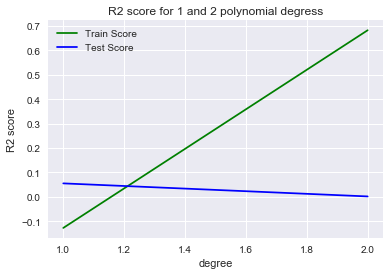

In [84]:


train_score_list = []
test_score_list = []
lreg = LinearRegression()
for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(r2_score(lreg.predict(X_train_poly), y_train))
    test_score_list.append(r2_score(lreg.predict(X_test_poly), y_test))

%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('R2 score')
plt.legend()
plt.title('R2 score for 1 and 2 polynomial degress')

In [85]:

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
X_poly_test = poly_reg.fit_transform(X_test)
poly_reg.fit(X_poly_test, y_test)
y_pred=lin_reg_2.predict(X_poly_test)
print('Median Abs Error = {}'.format((median_absolute_error(y_test, y_pred))))
poly_mae=median_absolute_error(y_test, y_pred)
poly_r2=r2_score(y_test, y_pred)

Median Abs Error = 52.35617087304581


# Ridge Regression -

C:\Users\vikas\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.346742690860133e-25 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\vikas\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.3467426908601327e-23 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\vikas\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.3467426908601323e-22 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\vikas\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not g

Text(0, 0.5, 'Median Absolute Error')

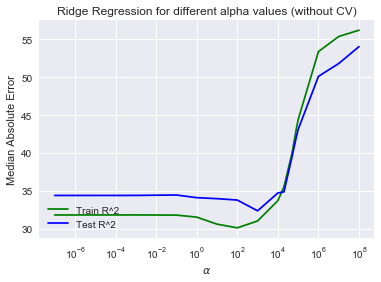

In [86]:


#x_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
alphas = [0.0000001, 0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1e3, 1e4, 2e4, 5e4, 8e4, 1e5, 1e6, 1e7, 1e8]
train_r2_list = []
test_r2_list = []
train_score=[]
test_score=[]
for alpha in alphas: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    #y_pred=ridge.predict(X_poly_test)
    y_pred_train=ridge.predict(X_train)
    y_pred_test=ridge.predict(X_test)
    #train_r2_list.append(ridge.predict(X_train))
    #test_r2_list.append(ridge.predict(X_test))
    train_score.append(r2_score(y_train,y_pred_train))
    test_score.append(r2_score(y_test, y_pred_test))
    train_r2_list.append(median_absolute_error(y_train, y_pred_train))
    test_r2_list.append(median_absolute_error(y_test, y_pred_test))

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(alphas, train_r2_list, c = 'g', label = 'Train R^2')
plt.plot(alphas, test_r2_list, c = 'b', label = 'Test R^2')
#plt.plot(x_range, test_r2_list, c = 'b', label = 'Test R^2')
plt.xscale('log')
plt.legend(loc = 3)
plt.title('Ridge Regression for different alpha values (without CV)')
plt.xlabel(r'$\alpha$')
plt.ylabel('Median Absolute Error')

In [87]:
ridge_mae=np.min(test_r2_list)
ridge_r2=np.max(test_score)

Text(0, 0.5, 'R square values')

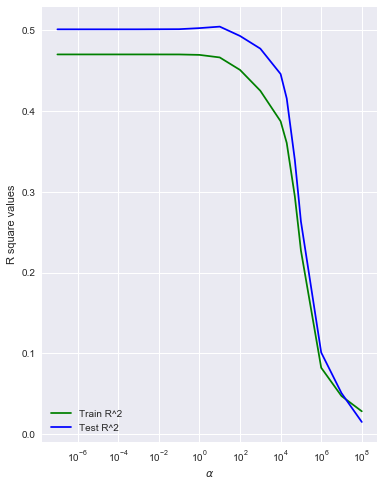

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(6,8))
plt.plot(alphas, train_score, c = 'g', label = 'Train R^2')
plt.plot(alphas, test_score, c = 'b', label = 'Test R^2')
plt.xscale('log')
#plt.yscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.ylabel('R square values')

In [89]:
alphas = 10**np.linspace(6,-2,50)*0.5
alphas

array([5.00000000e+05, 3.43324423e+05, 2.35743318e+05, 1.61872877e+05,
       1.11149824e+05, 7.63208984e+04, 5.24056567e+04, 3.59842837e+04,
       2.47085668e+04, 1.69661089e+04, 1.16497591e+04, 7.99929360e+03,
       5.49270571e+03, 3.77156003e+03, 2.58973734e+03, 1.77824015e+03,
       1.22102655e+03, 8.38416468e+02, 5.75697700e+02, 3.95302161e+02,
       2.71433772e+02, 1.86379686e+02, 1.27977396e+02, 8.78755312e+01,
       6.03396320e+01, 4.14321386e+01, 2.84493301e+01, 1.95346997e+01,
       1.34134790e+01, 9.21034985e+00, 6.32427608e+00, 4.34255687e+00,
       2.98181166e+00, 2.04745753e+00, 1.40588435e+00, 9.65348864e-01,
       6.62855683e-01, 4.55149089e-01, 3.12527596e-01, 2.14596713e-01,
       1.47352585e-01, 1.01179482e-01, 6.94747747e-02, 4.77047738e-02,
       3.27564278e-02, 2.24921633e-02, 1.54442180e-02, 1.06047544e-02,
       7.28174239e-03, 5.00000000e-03])

In [98]:

ridgecv = RidgeCV(alphas=alphas, normalize=True)
ridgecv.fit(X_train, y_train)

print("Alpha=", ridgecv.alpha_)
ridge6 = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge6.fit(X_train, y_train)
y_pred=ridge6.predict(X_test)
print("R^2 score = ",r2_score(y_test,y_pred))
print("mse = ",median_absolute_error(y_test, ridge6.predict(X_test)))
print("best model coefficients:")

pd.Series(ridge6.coef_, index=X.columns)

Alpha= 0.21459671300643934
R^2 score =  0.4244425926876231
mse =  31.685234899272494
best model coefficients:


id                           3.540592e-07
host_response_rate           2.061844e-01
host_is_superhost            3.504465e+00
host_listings_count          2.819826e-01
review_scores_rating         4.079578e-01
accommodates                 7.619661e+00
bathrooms                    2.412343e+01
bedrooms                     2.247180e+01
beds                         7.878366e+00
reviews_per_month           -2.780505e+00
has_availability             0.000000e+00
number_of_reviews           -2.637570e-02
review_scores_accuracy       4.099133e+00
review_scores_cleanliness    5.642783e+00
review_scores_checkin       -1.236143e+01
guests_included              2.145510e+00
extra_people                -8.015966e-02
review_scores_location      -2.802320e+00
review_scores_value         -2.191544e-01
minimum_nights              -1.269924e-01
maximum_nights               6.475703e-03
availability_365             5.850285e-02
harvesine_distance          -1.560287e+00
cancellation_policy_1       -7.372

# Lasso

In [90]:

x_range = [0.001,0.01, 0.1, 1, 10, 100, 1000]
train_score_list = []
test_score_list = []
test_mae=[]
for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))
    test_mae.append(median_absolute_error(y_test, lasso.predict(X_test)))
lasso_r2=np.max(test_score_list)
lasso_mae=np.min(test_mae)

Text(0.5, 0, '$\\alpha$')

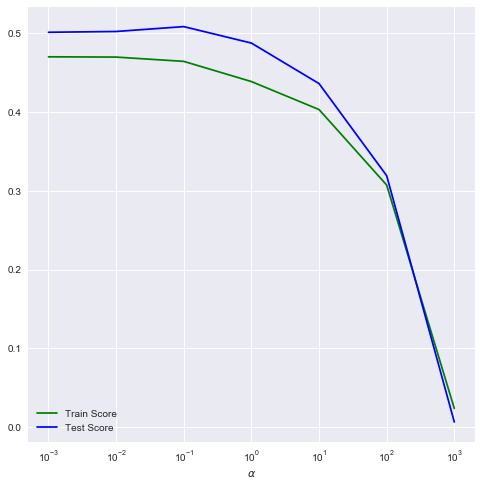

In [91]:
plt.figure(figsize=(8,8))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

Text(0.5, 1.0, 'Standardized Lasso regression coefficients')

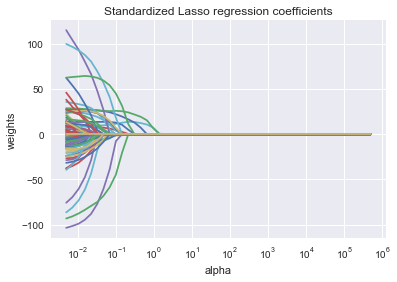

In [92]:


lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
np.shape(coefs)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Standardized Lasso regression coefficients')

As alpha increases, the standardized Lasso regression coefficients shrinks to zero (features are suppressed to zero)

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

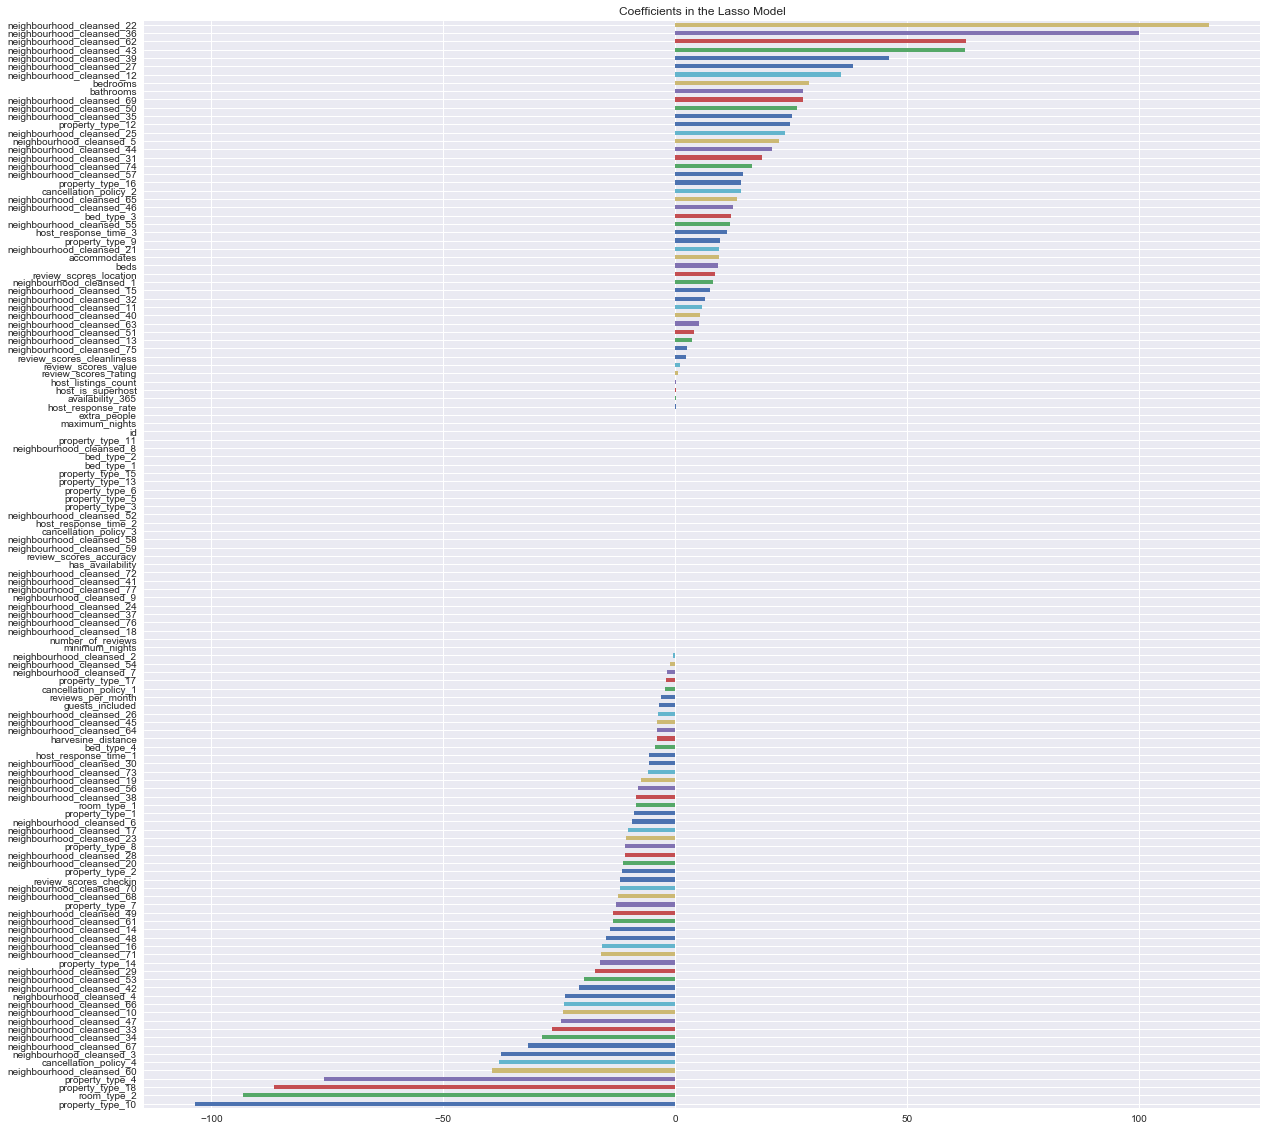

In [96]:
coef = pd.Series(lasso.coef_, index = X_train.columns)
coef.head()

imp_coef = pd.concat([coef.sort_values()])
#matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
plt.figure(figsize=(20,20))
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

Above plot shows the feature importance for Lasso regression

In [97]:
from sklearn import cross_validation
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5, random_state=1)

lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)

print('Score = ',lasso.score(X_test, y_test))
print("Alpha=", lassocv.alpha_)
lasso.fit(X_train, y_train)
y_pred=lasso.predict(X_test)
print("R^2 score = ",r2_score(y_test,y_pred))
print("mae = ",mean_absolute_error(y_test, lasso.predict(X_test)))
#print("RMSE = ", np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))
print("best model coefficients:")
pd.Series(lasso.coef_, index=X.columns)

Score =  0.4608064934820043
Alpha= 0.033033567143317344
R^2 score =  0.4256472834606999
mae =  50.144704610516925
best model coefficients:


id                           2.838276e-07
host_response_rate           1.502024e-01
host_is_superhost            1.942299e+00
host_listings_count          3.115024e-01
review_scores_rating         1.475253e-01
accommodates                 9.615227e+00
bathrooms                    2.605797e+01
bedrooms                     2.855237e+01
beds                         4.628237e+00
reviews_per_month           -2.679956e+00
has_availability             0.000000e+00
number_of_reviews           -2.344295e-03
review_scores_accuracy       1.682332e+00
review_scores_cleanliness    5.049004e+00
review_scores_checkin       -9.043945e+00
guests_included              0.000000e+00
extra_people                -0.000000e+00
review_scores_location      -0.000000e+00
review_scores_value          0.000000e+00
minimum_nights              -9.909219e-02
maximum_nights               4.369986e-03
availability_365             5.388800e-02
harvesine_distance          -1.921635e+00
cancellation_policy_1       -6.427

No handles with labels found to put in legend.


[0.52512916 0.52681759 0.41132469 0.6121611  0.38781131 0.34976129
 0.44278334 0.40571154 0.45424261 0.24695617]


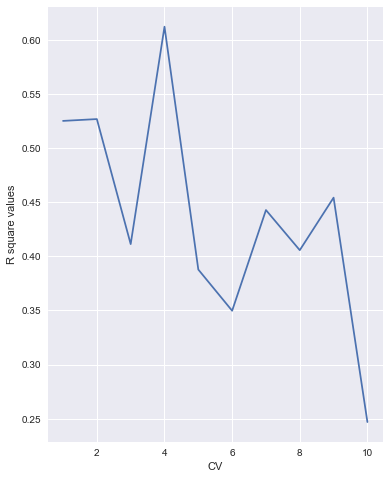

In [99]:

#X = # Some features
#y = # Some classes
cv_count=[1,2,3,4,5,6,7,8,9,10]
clf = linear_model.Lasso()
scores = cross_val_score(clf, X, y, cv=10)
#cv_count=range(1,10)
plt.figure(figsize=(6,8))
plt.plot(cv_count,scores)
#plt.plot(alphas, test_score, c = 'b', label = 'Test R^2')
#plt.xscale('log')
#plt.yscale('log')
plt.legend(loc = 3)
plt.xlabel('CV')
plt.ylabel('R square values')
print(scores)

# Stochastic Gradient Descent

In [207]:


sgd_reg = SGDRegressor(random_state= 0, max_iter = 10000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train, y_train)
y_train_pred=sgd_reg.predict(X_train)
y_test_pred=sgd_reg.predict(X_test)
print('MAE for testing set - ',format(median_absolute_error(y_train, y_train_pred)))
print('MAE for testing set - ',format(median_absolute_error(y_test, y_test_pred)))
print('R2 score - ', format(r2_score(y_test, y_test_pred)))
sgd_mae=median_absolute_error(y_test, y_test_pred)
sd_r2=r2_score(y_test, y_test_pred)

MAE for testing set -  0.24357709108651382
MAE for testing set -  0.26452759719320795
R2 score -  0.9210581232422679


# KNN Regressor

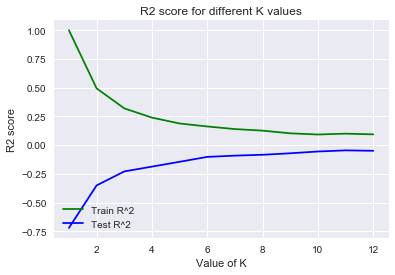

In [101]:

R2_train=[]
R2_test=[]
Mae=[]
knn=[1,2,3,4,5,6,7,8,9,10,11,12]
for k in knn:
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)
    y_pred=neigh.predict(X_test)
    R2_train.append(r2_score(y_train, neigh.predict(X_train)))
    R2_test.append(r2_score(y_test,y_pred))
    Mae.append(mean_absolute_error(y_test, y_pred))

plt.plot(knn, R2_train, c = 'g', label = 'Train R^2')
plt.plot(knn, R2_test, c = 'b', label = 'Test R^2')
#plt.plot(x_range, test_r2_list, c = 'b', label = 'Test R^2')
#plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('Value of K')
plt.ylabel('R2 score')
plt.title('R2 score for different K values')
knn_mae=np.min(Mae)
knn_r2=np.max(R2_test)

R2 scores for training and testing set for different K values. 
As we can see, the training score reduces with the increase in K number of neighbors and test score increases with number of neighbors. 
In this case, KNN Regressor is not doing a good job fitting the training set.

No handles with labels found to put in legend.


Text(0.5, 1.0, 'MAE for different K values')

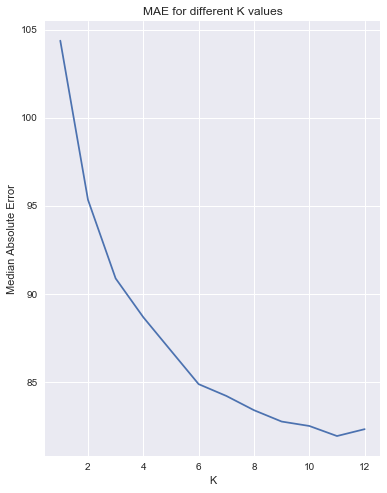

In [102]:
plt.figure(figsize=(6,8))
plt.plot(knn,Mae)
#plt.plot(alphas, test_score, c = 'b', label = 'Test R^2')
#plt.xscale('log')
#plt.yscale('log')
plt.legend(loc = 3)
plt.xlabel('K')
plt.ylabel('Median Absolute Error')
plt.title('MAE for different K values')

Similarly, Median Absolute Error reduces with increase in neighbors. But the best R2 score was for K=1, but the MAE value is very large. Hence, KNN regressor doesn't do a good job.

# SVM Regression

In [103]:

kernels=['linear', 'rbf']
c=[0.01, 0.5, 0.1,1,2,5,8]
R2_linear=[]
R2_rbf=[]
mae_linear=[]
mae_rbf=[]


for c_ in tqdm(c):
    svr=SVR(kernel='rbf', C=c_ )
    svr.fit(X_train, y_train)
    y_pred=svr.predict(X_test)
    R2_rbf.append(r2_score(y_test, y_pred))
    mae_rbf.append(median_absolute_error(y_test, y_pred))
svr_R2=np.max(R2_rbf)
svr_mae=np.min(mae_rbf)


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:17<00:00,  2.54s/it]


No handles with labels found to put in legend.


Text(0.5, 1.0, 'MAE for different C values')

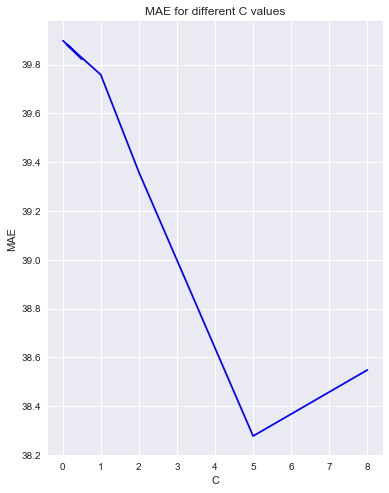

In [107]:
plt.figure(figsize=(6,8))
plt.plot([0.01, 0.5, 0.1,1,2,5,8], mae_rbf, c='b')
plt.legend(loc = 3)
plt.xlabel('C')
plt.ylabel('MAE')
plt.title('MAE for different C values')

R2 Scores for different number of folds. We can see that best MAE value was at CV=5 folds.

In [106]:
#Lasso with CV

In [105]:
cv = KFold(n_splits = 5)
lasso = LassoCV(alphas = lambdas, tol = 0.01, fit_intercept = False, normalize = True, cv = 5)

# Store r2 and median absolute error
MAE =[]
R2 = []

# Find best score by cross validating over 5 folds
for train, test in cv.split(X_train):
    # Fit linreg
    lasso.fit(X_train.iloc[train], y.iloc[train])
    
    # Predict and score
    Y_predict = lasso.predict(X_train.iloc[test])
    R2.append(lasso.score(X_train.iloc[test], y.iloc[test]))
    MAE.append(median_absolute_error(y.iloc[test], Y_predict))

# Output and store scores after CV
lasso_testing_set_score = np.mean(R2)
lasso_median_abs_error = np.mean(MAE)
print('The R^2 score on our testing data is: ' + str(round(lasso_testing_set_score,3)))
print('The median absolute error on our testing data is: ' + str(round(lasso_median_abs_error,3)))

C:\Users\vikas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\vikas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\vikas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\vikas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

The R^2 score on our testing data is: -0.013
The median absolute error on our testing data is: 49.379


# Regression using GridsearchCV

In [116]:
#Gridsearchcv SVR

In [108]:
# Create a classifier object with the Regressor and parameter candidates


parameter_candidates = [{'C': [0.001,0.01,0.1, 1,5, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]
clf = GridSearchCV(estimator=SVR(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on data1's feature and target data
clf.fit(X_train, y_train) 
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)


y_pred=clf.predict(X_test)# y_test) #
print(median_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(clf.best_estimator_)

Best C: 1000
Best Kernel: rbf
57.40316365613779
0.0016935060592953022
SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [109]:
#Lasso with gridsearchcv - Lets see what the best hyperparameters 

In [110]:
parameter_candidates = [{'alpha': [0.001,0.01,0.1, 1,5, 10, 100, 1000],'max_iter':[5000,10000,20000]}, ]#'n_alphas':[7],'cv': [4,5,6,7,8,9,10]},]
clf = GridSearchCV(estimator=Lasso(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on data1's feature and target data
clf.fit(X_train, y_train) 
print('Best alpha:',clf.best_estimator_.alpha )
#print('Best Kernel:',clf.best_estimator_.cv)


y_pred=clf.predict(X_test)# y_test) #
print(median_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(clf.best_estimator_)

Best alpha: 1
30.0696377448907
0.4150606371237018
Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


In [115]:
#Ridge Regression with gridsearchcv

In [111]:
parameter_candidates = [{'alpha': [0.001,0.01,0.1, 1,5, 10, 100, 1000],'max_iter':[5000,10000,20000]}, ]#'n_alphas':[7],'cv': [4,5,6,7,8,9,10]},]
clf = GridSearchCV(estimator=Ridge(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on data1's feature and target data
clf.fit(X_train, y_train) 
print('Best alpha:',clf.best_estimator_.alpha )
#print('Best Kernel:',clf.best_estimator_.cv)


y_pred=clf.predict(X_test)# y_test) #
print(median_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(clf.best_estimator_)

Best alpha: 100
30.082187168519283
0.4173125902380679
Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [114]:
#K neighbors Regression with gridsearchcv

In [112]:
parameter_candidates = [{'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]},]#
clf = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on data1's feature and target data
clf.fit(X_train, y_train) 
print('Best K:',clf.best_estimator_.n_neighbors )
#print('Best Kernel:',clf.best_estimator_.cv)


y_pred=clf.predict(X_test)# y_test) #
print(median_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(clf.best_estimator_)

Best K: 14
57.17857142857143
-0.04546012466261762
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=14, p=2,
          weights='uniform')


Evaluation - Comparison
-Without Gridsearchcv


([<matplotlib.axis.YTick at 0x2cc06f28908>,
 <a list of 6 Text yticklabel objects>)

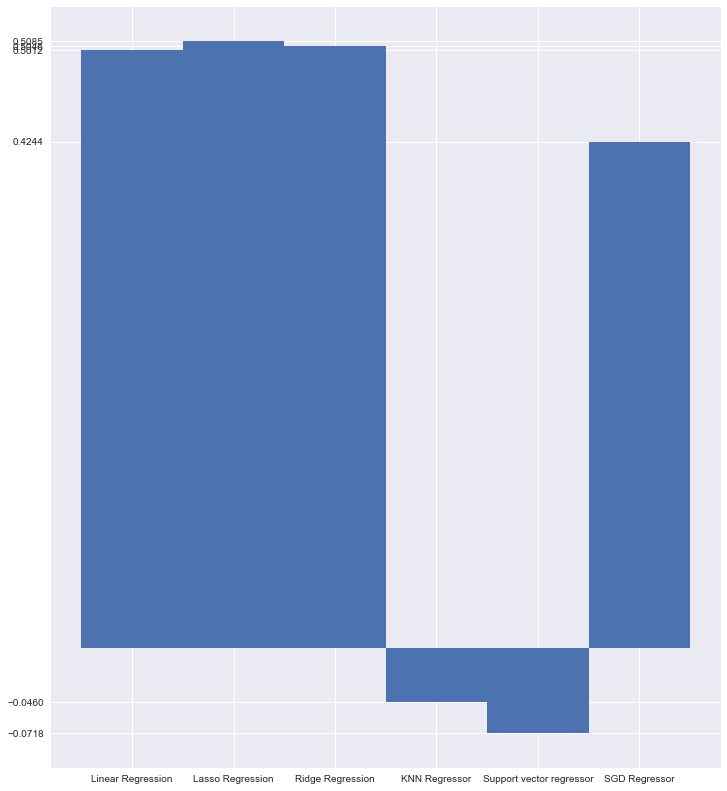

In [113]:
r2_list=[('Linear Regression',lin_r2), 
         ('Lasso Regression',lasso_r2), ('Ridge Regression',ridge_r2), ('KNN Regressor',knn_r2), ('Support vector regressor',svr_R2),
         ('SGD Regressor',sd_r2)]
         
#top=[('a',1.875),('c',1.125),('d',0.5)]
plt.figure(figsize=(12,14))
labels, ys = zip(*r2_list)
xs = np.arange(len(labels)) 
width = 1

plt.bar(xs, ys, width, align='center')

plt.xticks(xs, labels) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)



Lasso Regression is doing a better job compared to all other models (using both R2 scores and MAE metrics). The above plot represents the same. The next best model that fits well is Ridge Regression.

# Classification - Part 2

We chose 'Mobile Price Classification' dataset from Kaggle which has 21 columns and 2000 rows in the train.csv file. Aim is to classify the mobile prices based on the specifications.
Like to the dataset - https://www.kaggle.com/iabhishekofficial/mobile-price-classification#train.csv 

We have imputed some missing values randomly to match the scoring requirements. 

In [117]:
Data_train = pd.read_csv("Mobile_Price_Classification(Dataset).csv")

In [118]:
Data_train.shape # The dataset contains 2000 rows and 21 columns

(2000, 21)

In [119]:
Data_train.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    1958.000000  2000.0000  1989.000000  2000.000000  2000.000000   
mean     1237.733912     0.4950     1.521518     0.509500     4.309500   
std       442.248020     0.5001     0.816418     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       844.500000     0.0000     0.700000     0.000000     1.000000   
50%      1224.500000     0.0000     1.500000     1.000000     3.000000   
75%      1619.000000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  1990.000000  1978.000000  1989.000000  1980.000000  2000.000000   
mean      0.522111    32.071790     0.500855   140.152020     4.520500   
std       0.499636    18.227137     0.288398    35.445816     2.287837   
min       0.000000     2.000000     0.100000    80.000000     1.000000   
25%       0.000000    16.000000     0.200000   109.000000     3.000000   
50%       1.000000    32.000000     0.500000   140.000000     4.000000   
75%       1.000000    48.000000     0.800000   170.000000     7.000000   
max       1.000000    64.000000     1.000000   200.000000     8.000000   

          ...         px_height     px_width          ram         sc_h  \
count     ...       1983.000000  1987.000000  1993.000000  2000.000000   
mean      ...        645.298033  1252.344741  2123.308078    12.306500   
std       ...        444.727235   432.878178  1086.380656     4.213245   
min       ...          0.000000   500.000000   256.000000     5.000000   
25%       ...        282.000000   874.500000  1205.000000     9.000000   
50%       ...        562.000000  1248.000000  2146.000000    12.000000   
75%       ...        948.000000  1633.500000  3068.000000    16.000000   
max       ...       1960.000000  1998.000000  3998.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  \
count  1986.000000  2000.000000  1994.000000   1990.000000  2000.000000   
mean      5.780967    11.011000     0.760782      0.502513     0.507000   
std       4.359518     5.463955     0.426713      0.500119     0.500076   
min       0.000000     2.000000     0.000000      0.000000     0.000000   
25%       2.000000     6.000000     1.000000      0.000000     0.000000   
50%       5.000000    11.000000     1.000000      1.000000     1.000000   
75%       9.000000    16.000000     1.000000      1.000000     1.000000   
max      18.000000    20.000000     1.000000      1.000000     1.000000   

       price_range  
count  2000.000000  
mean      1.500000  
std       1.118314  
min       0.000000  
25%       0.750000  
50%       1.500000  
75%       2.250000  
max       3.000000  

[8 rows x 21 columns]

In [120]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    1958 non-null float64
blue             2000 non-null int64
clock_speed      1989 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           1990 non-null float64
int_memory       1978 non-null float64
m_dep            1989 non-null float64
mobile_wt        1980 non-null float64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        1983 non-null float64
px_width         1987 non-null float64
ram              1993 non-null float64
sc_h             2000 non-null int64
sc_w             1986 non-null float64
talk_time        2000 non-null int64
three_g          1994 non-null float64
touch_screen     1990 non-null float64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(12), int64(9)
memory usage: 328.2 KB


In [121]:
#converting price_range to categorical variable
Data_train['price_range'] = Data_train['price_range'].astype(object)

There are a number of missing values, the columns with missing values are :

In [122]:
Data_train.isna().sum()[Data_train.isna().sum()>0]

battery_power    42
clock_speed      11
four_g           10
int_memory       22
m_dep            11
mobile_wt        20
px_height        17
px_width         13
ram               7
sc_w             14
three_g           6
touch_screen     10
dtype: int64

In [123]:
#Replace NaN values in Battery Power column with the mean of their price range
price_range_battery=Data_train.groupby('price_range')['battery_power'].mean()

Data_P0=Data_train[Data_train['price_range']==0]
Data_P1=Data_train[Data_train['price_range']==1]
Data_P2=Data_train[Data_train['price_range']==2]
Data_P3=Data_train[Data_train['price_range']==3]

Data_P0['battery_power']=Data_P0['battery_power'].fillna(price_range_battery[0])
Data_P1['battery_power']=Data_P1['battery_power'].fillna(price_range_battery[1])
Data_P2['battery_power']=Data_P2['battery_power'].fillna(price_range_battery[2])
Data_P3['battery_power']=Data_P3['battery_power'].fillna(price_range_battery[3])

C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [124]:
Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()

In [125]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null float64
blue             2000 non-null int64
clock_speed      1989 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           1990 non-null float64
int_memory       1978 non-null float64
m_dep            1989 non-null float64
mobile_wt        1980 non-null float64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        1983 non-null float64
px_width         1987 non-null float64
ram              1993 non-null float64
sc_h             2000 non-null int64
sc_w             1986 non-null float64
talk_time        2000 non-null int64
three_g          1994 non-null float64
touch_screen     1990 non-null float64
wifi             2000 non-null int64
price_range      2000 non-null object
dtypes: float64(12), int64(8), object(1)
memory usage: 343.8+ KB


Here use to strategy to compute the mean of every column with respective to each price_range and then replace the NA values with the corresponding mean value 

In [126]:
# Treating null values for clock_speed column, replaced the null values with the respective price_rage mean

price_range_clockspeed=Data_train.groupby('price_range')['clock_speed'].mean()

Data_P0=Data_train[Data_train['price_range']==0]
Data_P1=Data_train[Data_train['price_range']==1]
Data_P2=Data_train[Data_train['price_range']==2]
Data_P3=Data_train[Data_train['price_range']==3]

Data_P0['clock_speed']=Data_P0['clock_speed'].fillna(price_range_clockspeed[0])
Data_P1['clock_speed']=Data_P1['clock_speed'].fillna(price_range_clockspeed[1])
Data_P2['clock_speed']=Data_P2['clock_speed'].fillna(price_range_clockspeed[2])
Data_P3['clock_speed']=Data_P3['clock_speed'].fillna(price_range_clockspeed[3])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()




C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [127]:
#int_memory
price_range_int_memory=Data_train.groupby('price_range')['int_memory'].mean()

Data_P0=Data_train[Data_train['price_range']==0]
Data_P1=Data_train[Data_train['price_range']==1]
Data_P2=Data_train[Data_train['price_range']==2]
Data_P3=Data_train[Data_train['price_range']==3]

Data_P0['int_memory']=Data_P0['int_memory'].fillna(price_range_int_memory[0])
Data_P1['int_memory']=Data_P1['int_memory'].fillna(price_range_int_memory[1])
Data_P2['int_memory']=Data_P2['int_memory'].fillna(price_range_int_memory[2])
Data_P3['int_memory']=Data_P3['int_memory'].fillna(price_range_int_memory[3])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()

Data_train.info()


C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null float64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           1990 non-null float64
int_memory       2000 non-null float64
m_dep            1989 non-null float64
mobile_wt        1980 non-null float64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        1983 non-null float64
px_width         1987 non-null float64
ram              1993 non-null float64
sc_h             2000 non-null int64
sc_w             1986 non-null float64
talk_time        2000 non-null int64
three_g          1994 non-null float64
touch_screen     1990 non-null float64
wifi             2000 non-null int64
price_range      2000 non-null object
dtypes: float64(12), int64(8), object(1)
memory usage: 343.8+ KB


In [128]:
#m_dep

price_range_m_dep=Data_train.groupby('price_range')['m_dep'].mean()

Data_P0=Data_train[Data_train['price_range']==0]
Data_P1=Data_train[Data_train['price_range']==1]
Data_P2=Data_train[Data_train['price_range']==2]
Data_P3=Data_train[Data_train['price_range']==3]

Data_P0['m_dep']=Data_P0['m_dep'].fillna(price_range_m_dep[0])
Data_P1['m_dep']=Data_P1['m_dep'].fillna(price_range_m_dep[1])
Data_P2['m_dep']=Data_P2['m_dep'].fillna(price_range_m_dep[2])
Data_P3['m_dep']=Data_P3['m_dep'].fillna(price_range_m_dep[3])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()

C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [129]:
#mobile_wt
price_range_mobile_wt=Data_train.groupby('price_range')['mobile_wt'].mean()

Data_P0=Data_train[Data_train['price_range']==0]
Data_P1=Data_train[Data_train['price_range']==1]
Data_P2=Data_train[Data_train['price_range']==2]
Data_P3=Data_train[Data_train['price_range']==3]

Data_P0['mobile_wt']=Data_P0['mobile_wt'].fillna(price_range_mobile_wt[0])
Data_P1['mobile_wt']=Data_P1['mobile_wt'].fillna(price_range_mobile_wt[1])
Data_P2['mobile_wt']=Data_P2['mobile_wt'].fillna(price_range_mobile_wt[2])
Data_P3['mobile_wt']=Data_P3['mobile_wt'].fillna(price_range_mobile_wt[3])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()

C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [130]:
#px_height
price_range_px_height=Data_train.groupby('price_range')['px_height'].mean()

Data_P0=Data_train[Data_train['price_range']==0]
Data_P1=Data_train[Data_train['price_range']==1]
Data_P2=Data_train[Data_train['price_range']==2]
Data_P3=Data_train[Data_train['price_range']==3]

Data_P0['px_height']=Data_P0['px_height'].fillna(price_range_px_height[0])
Data_P1['px_height']=Data_P1['px_height'].fillna(price_range_px_height[1])
Data_P2['px_height']=Data_P2['px_height'].fillna(price_range_px_height[2])
Data_P3['px_height']=Data_P3['px_height'].fillna(price_range_px_height[3])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()

C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [131]:
#px_width
price_range_px_width=Data_train.groupby('price_range')['px_width'].mean()

Data_P0=Data_train[Data_train['price_range']==0]
Data_P1=Data_train[Data_train['price_range']==1]
Data_P2=Data_train[Data_train['price_range']==2]
Data_P3=Data_train[Data_train['price_range']==3]

Data_P0['px_width']=Data_P0['px_width'].fillna(price_range_px_width[0])
Data_P1['px_width']=Data_P1['px_width'].fillna(price_range_px_width[1])
Data_P2['px_width']=Data_P2['px_width'].fillna(price_range_px_width[2])
Data_P3['px_width']=Data_P3['px_width'].fillna(price_range_px_width[3])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()

C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [132]:
#ram
price_range_ram=Data_train.groupby('price_range')['ram'].mean()

Data_P0=Data_train[Data_train['price_range']==0]
Data_P1=Data_train[Data_train['price_range']==1]
Data_P2=Data_train[Data_train['price_range']==2]
Data_P3=Data_train[Data_train['price_range']==3]

Data_P0['ram']=Data_P0['ram'].fillna(price_range_ram[0])
Data_P1['ram']=Data_P1['ram'].fillna(price_range_ram[1])
Data_P2['ram']=Data_P2['ram'].fillna(price_range_ram[2])
Data_P3['ram']=Data_P3['ram'].fillna(price_range_ram[3])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()

C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [133]:
#sc_w

price_range_sc_w=Data_train.groupby('price_range')['sc_w'].mean()

Data_P0=Data_train[Data_train['price_range']==0]
Data_P1=Data_train[Data_train['price_range']==1]
Data_P2=Data_train[Data_train['price_range']==2]
Data_P3=Data_train[Data_train['price_range']==3]

Data_P0['sc_w']=Data_P0['sc_w'].fillna(price_range_sc_w[0])
Data_P1['sc_w']=Data_P1['sc_w'].fillna(price_range_sc_w[1])
Data_P2['sc_w']=Data_P2['sc_w'].fillna(price_range_sc_w[2])
Data_P3['sc_w']=Data_P3['sc_w'].fillna(price_range_sc_w[3])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()
Data_train.info()

C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null float64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           1990 non-null float64
int_memory       2000 non-null float64
m_dep            2000 non-null float64
mobile_wt        2000 non-null float64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null float64
px_width         2000 non-null float64
ram              2000 non-null float64
sc_h             2000 non-null int64
sc_w             2000 non-null float64
talk_time        2000 non-null int64
three_g          1994 non-null float64
touch_screen     1990 non-null float64
wifi             2000 non-null int64
price_range      2000 non-null object
dtypes: float64(12), int64(8), object(1)
memory usage: 343.8+ KB


In [134]:
# Now that we have handled missing values for the numerical columns, lets impute the the values in the similar way for the categorical columns
#As we can see each of the categorical columns have the data type as int, lets convert them to object data type
Data_train['dual_sim'] = Data_train['dual_sim'].astype(object)
Data_train['four_g'] = Data_train['four_g'].astype(object)
Data_train['three_g'] = Data_train['three_g'].astype(object)
Data_train['touch_screen'] = Data_train['touch_screen'].astype(object)
Data_train['wifi'] = Data_train['wifi'].astype(object)
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null float64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null object
fc               2000 non-null int64
four_g           1990 non-null object
int_memory       2000 non-null float64
m_dep            2000 non-null float64
mobile_wt        2000 non-null float64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null float64
px_width         2000 non-null float64
ram              2000 non-null float64
sc_h             2000 non-null int64
sc_w             2000 non-null float64
talk_time        2000 non-null int64
three_g          1994 non-null object
touch_screen     1990 non-null object
wifi             2000 non-null object
price_range      2000 non-null object
dtypes: float64(9), int64(6), object(6)
memory usage: 343.8+ KB


lets follow the same strategy, but this time lets impute the rows with the mode of the values with respective to each price range
Note : We are not finding the mean/mode of the column itself, instead we are grouping the NA values with respect to each price range and then find the mean/mode for that price range


In [135]:
#four_g
mode_fourg_P0=Data_train[Data_train.price_range==0]['four_g'].mode()
mode_fourg_P0[0]

mode_fourg_P1=Data_train[Data_train.price_range==1]['four_g'].mode()
mode_fourg_P1[0]

mode_fourg_P2=Data_train[Data_train.price_range==2]['four_g'].mode()
mode_fourg_P2[0]

mode_fourg_P3=Data_train[Data_train.price_range==3]['four_g'].mode()
mode_fourg_P3[0]



1.0

In [136]:
Data_P0['four_g']=Data_P0['four_g'].fillna(mode_fourg_P0[0])
Data_P1['four_g']=Data_P1['four_g'].fillna(mode_fourg_P1[0])
Data_P2['four_g']=Data_P2['four_g'].fillna(mode_fourg_P2[0])
Data_P3['four_g']=Data_P3['four_g'].fillna(mode_fourg_P3[0])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()

Data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null float64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null float64
int_memory       2000 non-null float64
m_dep            2000 non-null float64
mobile_wt        2000 non-null float64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null float64
px_width         2000 non-null float64
ram              2000 non-null float64
sc_h             2000 non-null int64
sc_w             2000 non-null float64
talk_time        2000 non-null int64
three_g          1994 non-null float64
touch_screen     1990 non-null float64
wifi             2000 non-null int64
price_range      2000 non-null object
dtypes: float64(12), int64(8), object(1)
memory usage: 343.8+ KB


In [137]:
#three_g
mode_threeg_P0=Data_train[Data_train.price_range==0]['three_g'].mode()
mode_fourg_P0[0]

mode_threeg_P1=Data_train[Data_train.price_range==1]['three_g'].mode()
mode_threeg_P1[0]

mode_threeg_P2=Data_train[Data_train.price_range==2]['three_g'].mode()
mode_threeg_P2[0]

mode_threeg_P3=Data_train[Data_train.price_range==3]['three_g'].mode()
mode_threeg_P3[0]

Data_P0['three_g']=Data_P0['three_g'].fillna(mode_threeg_P0[0])
Data_P1['three_g']=Data_P1['three_g'].fillna(mode_threeg_P1[0])
Data_P2['three_g']=Data_P2['three_g'].fillna(mode_threeg_P2[0])
Data_P3['three_g']=Data_P3['three_g'].fillna(mode_threeg_P3[0])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()


In [138]:
#Touch screen

mode_tc_P0=Data_train[Data_train.price_range==0]['touch_screen'].mode()
mode_tc_P0[0]

mode_tc_P1=Data_train[Data_train.price_range==1]['touch_screen'].mode()
mode_tc_P1[0]

mode_tc_P2=Data_train[Data_train.price_range==2]['touch_screen'].mode()
mode_tc_P2[0]

mode_tc_P3=Data_train[Data_train.price_range==3]['touch_screen'].mode()
mode_tc_P3[0]

Data_P0['touch_screen']=Data_P0['touch_screen'].fillna(mode_tc_P0[0])
Data_P1['touch_screen']=Data_P1['touch_screen'].fillna(mode_tc_P1[0])
Data_P2['touch_screen']=Data_P2['touch_screen'].fillna(mode_tc_P2[0])
Data_P3['touch_screen']=Data_P3['touch_screen'].fillna(mode_tc_P3[0])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()

In [139]:
Data_train.info()
# we can be sure that there are no more missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null float64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null float64
int_memory       2000 non-null float64
m_dep            2000 non-null float64
mobile_wt        2000 non-null float64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null float64
px_width         2000 non-null float64
ram              2000 non-null float64
sc_h             2000 non-null int64
sc_w             2000 non-null float64
talk_time        2000 non-null int64
three_g          2000 non-null float64
touch_screen     2000 non-null float64
wifi             2000 non-null int64
price_range      2000 non-null object
dtypes: float64(12), int64(8), object(1)
memory usage: 343.8+ KB


# Data Exploration

In [140]:
Data_train['price_range'].unique()
# The price_range is for 0,1,2,3 

array([1, 2, 3, 0], dtype=object)

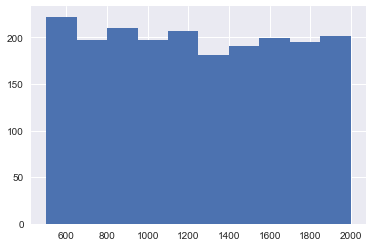

In [141]:
plt.hist(Data_train['battery_power'])
plt.show() # we observe that low power batteries are slightly more in number

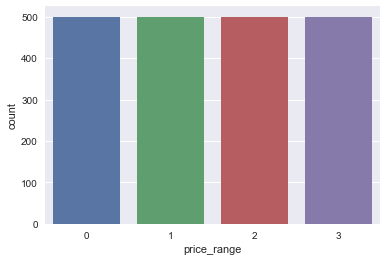

In [142]:
sns.countplot(Data_train['price_range'])
plt.show()   # The data has approximately the same amount of  price_range across the dataset

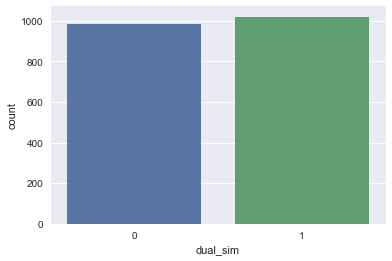

In [143]:
sns.countplot(Data_train['dual_sim'])
plt.show() # there are more number phones with dual sim than those without it.

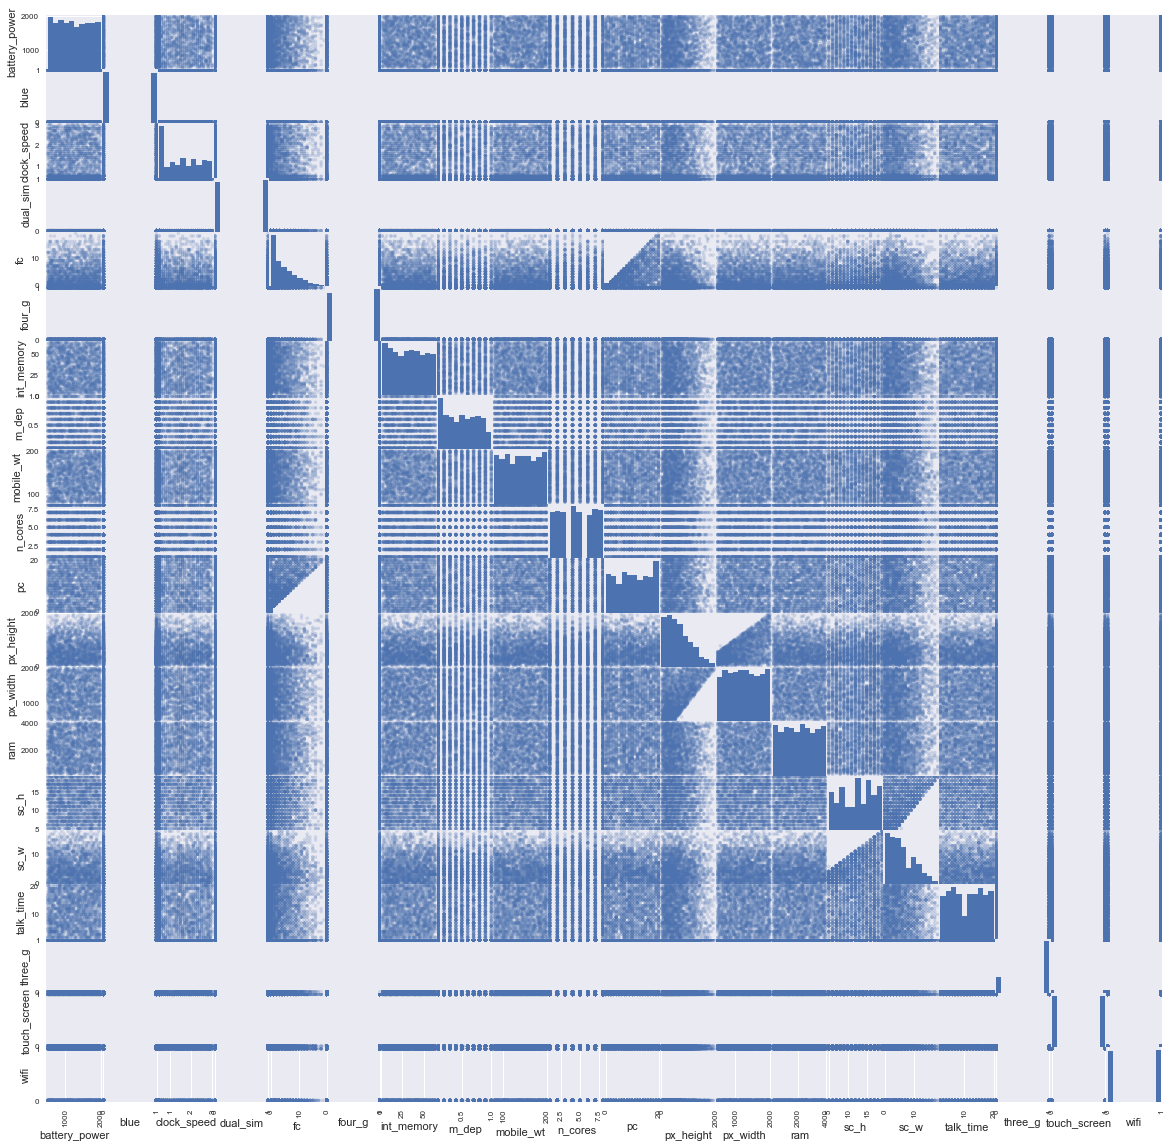

In [144]:
pd.plotting.scatter_matrix(Data_train, alpha = '0.2', figsize = (20,20))
plt.show()

As we can see above , some of the data such as clock_speed , fc , m_dep , px_height and sc_w are positively skewed 

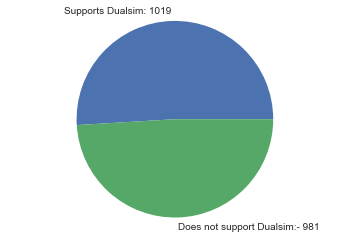

In [145]:
x=Data_train['dual_sim'].value_counts()
labels='Supports Dualsim: '+str(x[1]),'Does not support Dualsim:- '+str(x[0])
sizes=[x[1],x[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



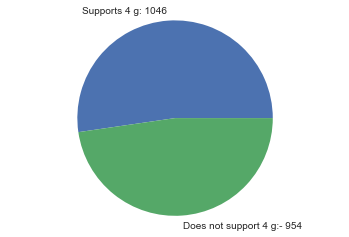

In [146]:
x=Data_train['four_g'].value_counts()
labels='Supports 4 g: '+str(x[1]),'Does not support 4 g:- '+str(x[0])
sizes=[x[1],x[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels)
ax1.axis('equal') 
plt.show()

# Phones with 4g support are high in number

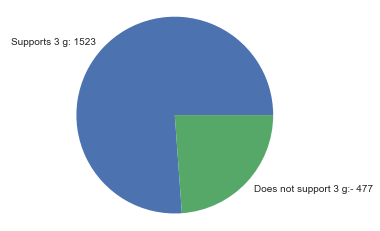

In [147]:
#pie chart representation
x=Data_train['three_g'].value_counts()
labels='Supports 3 g: '+str(x[1]),'Does not support 3 g:- '+str(x[0])
sizes=[x[1],x[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

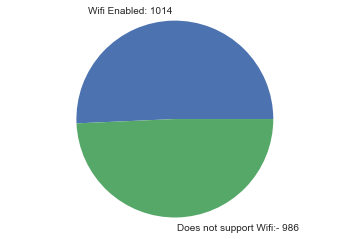

In [148]:
x=Data_train['wifi'].value_counts()
labels='Wifi Enabled: '+str(x[1]),'Does not support Wifi:- '+str(x[0])
sizes=[x[1],x[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#1014 phones are wifi enabled and 986 does not support wifi

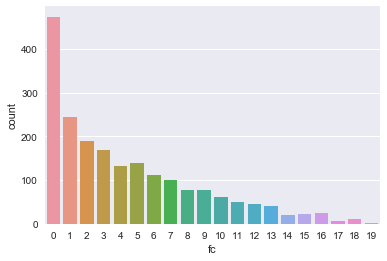

In [149]:
sns.countplot(x='fc', data=Data_train)
plt.show()

#most of the phones are have front camera = 0


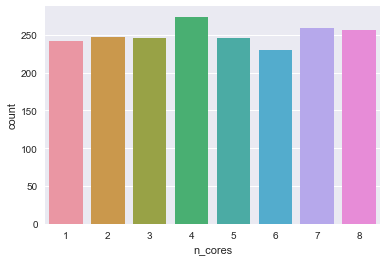

In [150]:
sns.countplot(x='n_cores', data=Data_train)
plt.show()

# the cores are almost equally distributed and there is less variation

In [151]:
# Lets observe how some of feautures are distributed with respect to price range : Bivariant Analysis
Data_train['price_range'] = Data_train['price_range'].astype(int)

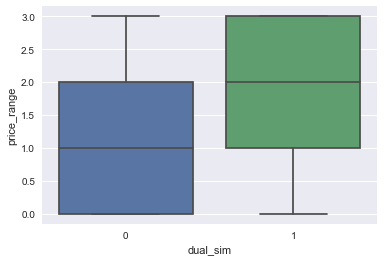

In [152]:
sns.boxplot(x='dual_sim',y='price_range',data=Data_train)
plt.show()

#phone that supports dula sim are more costlier than others 

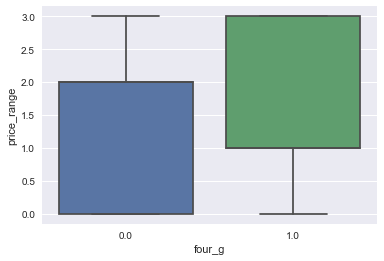

In [153]:
sns.boxplot(x='four_g',y='price_range',data=Data_train)
plt.show()

#mobile prices with 4g are costlier than other phones and same applies to three_g

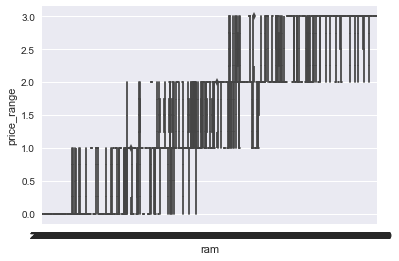

In [154]:
sns.boxplot(x='ram',y='price_range',data=Data_train)

# here we can see that the price increases as the ram size increases

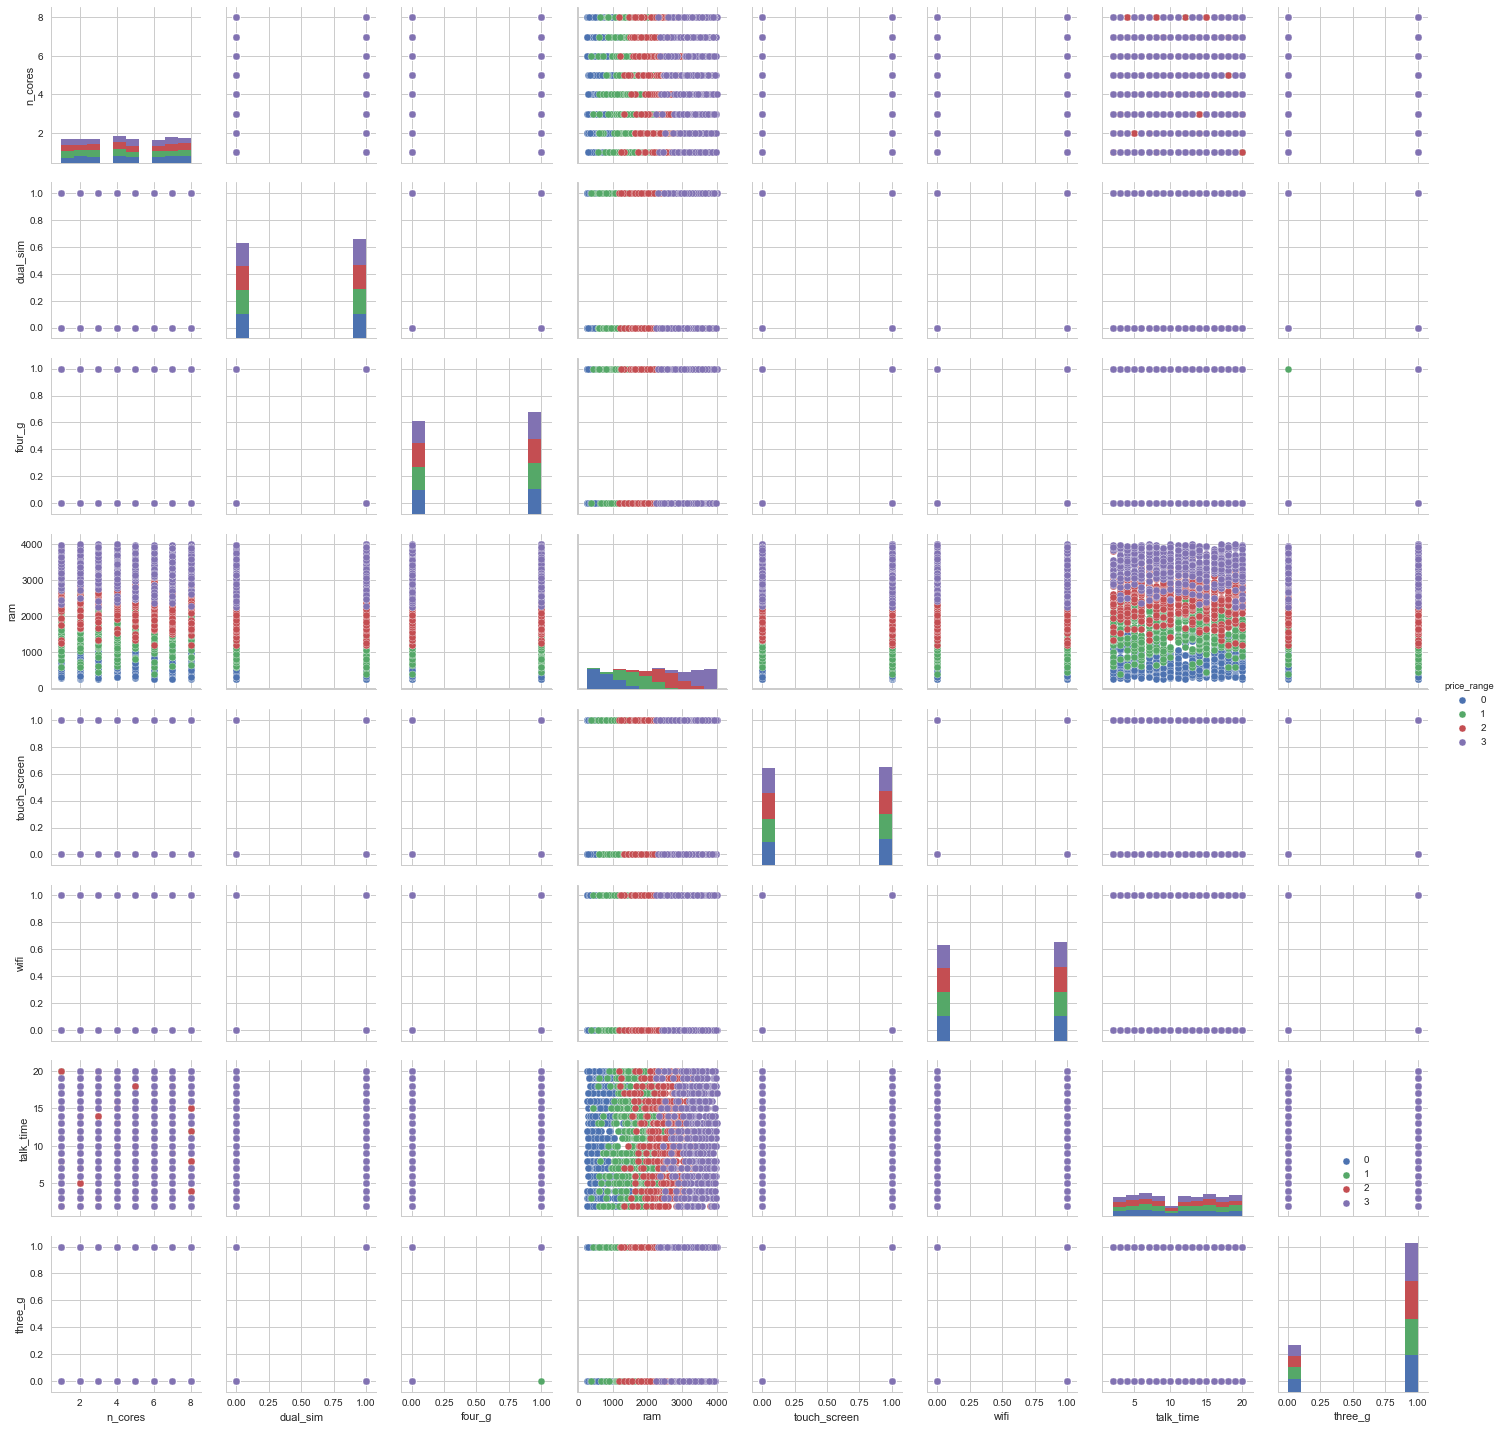

In [155]:
# pairwise scatter plot: Pair-Plot.
sns.set_style("whitegrid");
sns.pairplot(Data_train,hue='price_range',vars=['n_cores', 'dual_sim','four_g', 'ram','touch_screen','wifi','talk_time','three_g'])
plt.legend()
plt.show() 

# Data Modelling 
Now that we have completed the Data preprocessing and the Data Exploration , lets look at the Data Modelling
Here I have modelled using 
1) KNeighbors Classifier
2) Softmax Regression
3) Decison tree Classifier
4) SVC Classifier

# Splitting the Dataset and Scaling

In [156]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [157]:
X=Data_train.drop('price_range',axis=1)
y=Data_train['price_range'].values.astype(int)

In [158]:
# Splitting the dataset and scaling 
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0,)
scaler = MinMaxScaler()
# we have chozen to use min max scaler to retain the value of 0 , 1 for the categorical values
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


In [159]:
y_test

array([3, 0, 2, 2, 2, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 1, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 3, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 1, 2, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3,
       2, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 1, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 3, 3, 1, 0, 2, 0, 0, 0, 3, 2, 0, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 2, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [160]:
len(y_test)

500

# KNeighbor Classifier

In [161]:
#lets model the Kneighbor classifier for values of k from 1 to 35 and then lets choose the best value of K
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,35):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))
       

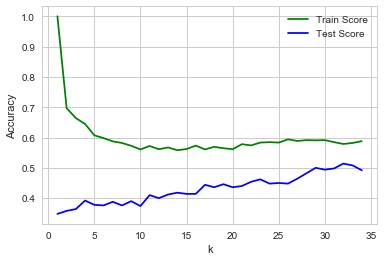

In [162]:
x_axis = range(1,35)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [163]:
# lets find the best value of k using the cross validation method using GridCV 

import sklearn.cross_validation 
import sklearn.grid_search
import sklearn.metrics
import sklearn.neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

 

C:\Users\vikas\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [164]:
k_range = range(1, 31)
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)


[0.3852604195822117, 0.34333386989371706, 0.3612899532271504, 0.38129997449336084, 0.3946517999398572, 0.37928195647534285, 0.3846468527730361, 0.3880072711940351, 0.4113953092609922, 0.41139548584541696, 0.4119998077992656, 0.4186711265245422, 0.4206713067127308, 0.42208536195202273, 0.4439748052866414, 0.44266348654534793, 0.43460525933284727, 0.4433617754382677, 0.451993119614125, 0.450686156621976, 0.4506504180966601, 0.4606778623594482, 0.45737113761612624, 0.45869098766751987, 0.45738444191113203, 0.4706911618494355, 0.4686647939107603, 0.46129047377080623, 0.46592629342084874, 0.4725045449467424]


Text(0, 0.5, 'Cross-Validated Accuracy')

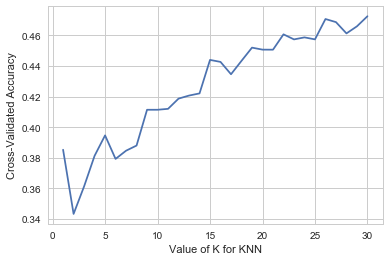

In [165]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

If you see here the training score is highest for K =25 , however this may overfit the model, hence a value of K close to 23 would provide a good model 

In [166]:
k_scores[23] #This would give us an accuracy of 0.4557 which would be considered good for the model

0.45869098766751987

In [167]:
#Now that we have obtained the value of K lets build the model and check the confusion matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, y_train)
predicted_price_train= knn.predict(X_train)
predicted_price_test = knn.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(predicted_price_train,y_train)))
print("Test Set Accuracy:"+str(accuracy_score(predicted_price_test,y_test)))

Train Set Accuracy:0.5833333333333334
Test Set Accuracy:0.462


In [168]:
len(y_test)

500

In [169]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report
print("\nConfusion Matrix:\n%s"%confusion_matrix(predicted_price_test,y_test))
print("\nClassification Report:\n%s"%classification_report(predicted_price_test,y_test))


Confusion Matrix:
[[73 45 21  2]
 [40 40 32 15]
 [10 22 48 54]
 [ 1  3 24 70]]

Classification Report:
             precision    recall  f1-score   support

          0       0.59      0.52      0.55       141
          1       0.36      0.31      0.34       127
          2       0.38      0.36      0.37       134
          3       0.50      0.71      0.59        98

avg / total       0.46      0.46      0.46       500



# 2) Softmax classification 

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# To form the base model , we have initially chozen the regularization parameter c as 10
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10 , max_iter=5000)
softmax_reg.fit(X_train, y_train)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [171]:
y_train_pred = softmax_reg.predict(X_train)
y_test_pred = softmax_reg.predict(X_test)


In [172]:
from sklearn.metrics import accuracy_score
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)))

Train Set Accuracy:0.9733333333333334
Test Set Accuracy:0.96


In the above model we used the value of c as 10, however we are not sure if this is the ideal hyper parameter. lets tune the hyperparameters.

In [173]:
#lets evaluate the model to find the best value of c

param_grid = {'C':[1, 10, 25, 50, 75, 100]}

In [174]:
grid1 = GridSearchCV(LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', max_iter = 5000), 
                     param_grid, cv =7 , return_train_score= True, iid = False)

In [175]:
grid1.fit(X_train, y_train)

GridSearchCV(cv=7, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'C': [1, 10, 25, 50, 75, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [176]:
print(grid1.best_params_)
print(grid1.best_score_)
print(grid1.scorer_)

{'C': 100}
0.9633446418636676
<function _passthrough_scorer at 0x000002CC3CFF4950>


Again this model using the cross validations folds cv =7 , to be sure if this is giving us the right results lets check the model with different values of cv

In [177]:
from tqdm import tqdm
cv = range(2,10)
train_accuracy_list = []
test_accuracy_list = []

for i in tqdm(cv): 
    
    grid1 = GridSearchCV(LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', max_iter = 5000), 
                     param_grid, cv =i , return_train_score= True, iid = False)
    grid1.fit(X_train, y_train)
    
    train_accuracy_list.append(grid1.best_score_)
    

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:54<00:00,  6.79s/it]


In [178]:
train_accuracy_list

[0.9506648011818688,
 0.9499985413274986,
 0.9633507500998231,
 0.9646731926651038,
 0.9606818541784841,
 0.9633446418636676,
 0.9633591628663594,
 0.9620220535979526]

Text(0, 0.5, 'Cross-Validated train score')

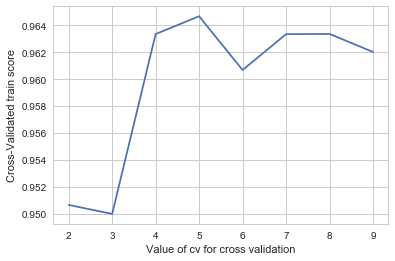

In [179]:
plt.plot(cv, train_accuracy_list)
plt.xlabel('Value of cv for cross validation')
plt.ylabel('Cross-Validated train score')

We see that the train score gets consistent at cv = 7, 8 ..hence we can choose the value of cv = 7 to get a good model.

Note that we have obtained the best C value as 100 and to avoid overfitting we need to reduce the C value and hence kets choose a C value of 75

In [180]:
# Lets build the model with C = 50 

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=75 , max_iter=5000)
softmax_reg.fit(X_train, y_train)


LogisticRegression(C=75, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [181]:
y_train_pred = softmax_reg.predict(X_train)
y_test_pred = softmax_reg.predict(X_test)


In [182]:
from sklearn.metrics import accuracy_score
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)))

Train Set Accuracy:0.9826666666666667
Test Set Accuracy:0.962


In [183]:
#from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))


Confusion Matrix:
[[121   3   0   0]
 [  3 103   3   0]
 [  0   4 118   2]
 [  0   0   4 139]]

Classification Report:
             precision    recall  f1-score   support

          0       0.98      0.98      0.98       124
          1       0.94      0.94      0.94       109
          2       0.94      0.95      0.95       124
          3       0.99      0.97      0.98       143

avg / total       0.96      0.96      0.96       500



# Decision Tree Classifier

In [184]:
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.808


In [185]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))


Accuracy on training set: 0.834
Accuracy on test set: 0.800


In [186]:
# lets find the best max_depth value 

param_grid = {'max_depth':[1, 2, 3, 5, 7, 10]}

grid3 = GridSearchCV(DecisionTreeClassifier(random_state = 0), param_grid, cv = 5, 
                    return_train_score= True, iid = False)
grid3.fit(X_train, y_train)
print(grid3.best_params_)
print(grid3.best_score_)
print(grid3.scorer_)

{'max_depth': 10}
0.8333548446834594
<function _passthrough_scorer at 0x000002CC3CFF4950>


In [187]:
result = pd.DataFrame(grid3.cv_results_)
result.head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.002194         0.000399         0.488662          0.489833   
1       0.003989         0.000599         0.752023          0.766669   
2       0.004188         0.000000         0.754021          0.774835   
3       0.006970         0.000399         0.825350          0.892336   
4       0.008178         0.000200         0.832668          0.960504   

  param_max_depth            params  rank_test_score  split0_test_score  \
0               1  {'max_depth': 1}                6           0.491694   
1               2  {'max_depth': 2}                5           0.710963   
2               3  {'max_depth': 3}                4           0.720930   
3               5  {'max_depth': 5}                3           0.833887   
4               7  {'max_depth': 7}                2           0.840532   

   split0_train_score  split1_test_score       ...         split2_test_score  \
0            0.489575           0.490000       ...                  0.486667   
1            0.778148           0.790000       ...                  0.723333   
2            0.783987           0.773333       ...                  0.733333   
3            0.899917           0.813333       ...                  0.803333   
4            0.969975           0.806667       ...                  0.836667   

   split2_train_score  split3_test_score  split3_train_score  \
0            0.489167           0.490000            0.490000   
1            0.774167           0.790000            0.759167   
2            0.780000           0.790000            0.765000   
3            0.889167           0.816667            0.895000   
4            0.956667           0.836667            0.966667   

   split4_test_score  split4_train_score  std_fit_time  std_score_time  \
0           0.484950            0.490425      0.000399        0.000489   
1           0.745819            0.761865      0.000892        0.000489   
2           0.752508            0.773522      0.000399        0.000000   
3           0.859532            0.884263      0.001553        0.000489   
4           0.842809            0.947544      0.000399        0.000399   

   std_test_score  std_train_score  
0        0.002471         0.000428  
1        0.032961         0.007897  
2        0.025269         0.006617  
3        0.019727         0.005306  
4        0.013212         0.007896  

[5 rows x 21 columns]

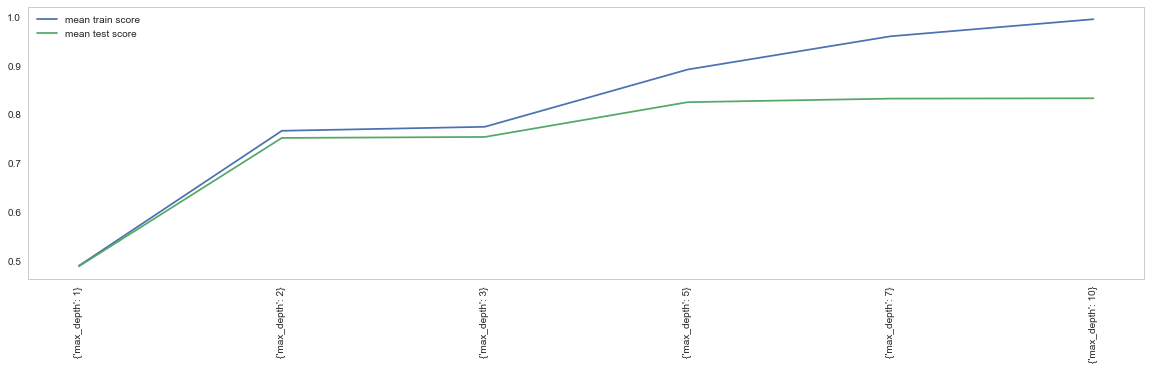

In [188]:
# Now we see that the best value of max_depth = 10
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([grid3.best_index_], result['mean_train_score'][grid3.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([grid3.best_index_], result['mean_test_score'][grid3.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [189]:
train_accuracy_list

[0.9506648011818688,
 0.9499985413274986,
 0.9633507500998231,
 0.9646731926651038,
 0.9606818541784841,
 0.9633446418636676,
 0.9633591628663594,
 0.9620220535979526]

Text(0, 0.5, 'Cross-Validated train score')

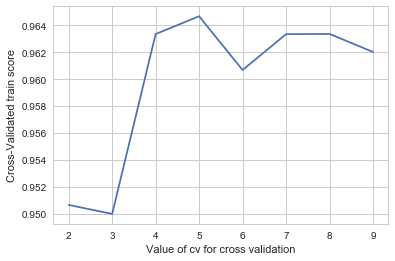

In [190]:
plt.plot(cv, train_accuracy_list)
plt.xlabel('Value of cv for cross validation')
plt.ylabel('Cross-Validated train score')

here we see that cv value of 7 would give us the highest training score, but that may overfit the model, hence cv= 5 and max_depth = 10 would give us the best results


In [191]:
#Model Building using Max_depth = 10

In [192]:
dtree = DecisionTreeClassifier(max_depth=10, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))


Accuracy on training set: 0.995
Accuracy on test set: 0.820


In [193]:
y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))


Confusion Matrix:
[[111   7   0   0]
 [ 13  88  16   0]
 [  0  15  90  20]
 [  0   0  19 121]]

Classification Report:
             precision    recall  f1-score   support

          0       0.90      0.94      0.92       118
          1       0.80      0.75      0.78       117
          2       0.72      0.72      0.72       125
          3       0.86      0.86      0.86       140

avg / total       0.82      0.82      0.82       500



# SVM Classifier

In [194]:
# lets build our first model 

from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(X_train,y_train)
print("train accuracy:",svm.score(X_train,y_train))
print("test accuracy:",svm.score(X_test,y_test))

train accuracy: 0.9133333333333333
test accuracy: 0.886


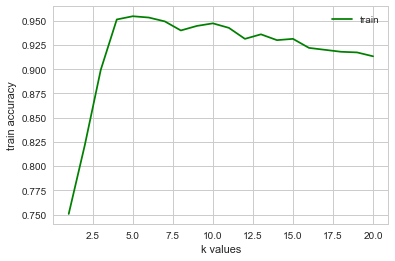

In [195]:
#Now lets select the best features for our model 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
accuracy_list_train = []
k=np.arange(1,21,1)
for each in k:
    x_new = SelectKBest(f_classif, k=each).fit_transform(X_train, y_train)
    svm.fit(x_new,y_train)
    accuracy_list_train.append(svm.score(x_new,y_train))   
    
plt.plot(k,accuracy_list_train,color="green",label="train")
plt.xlabel("k values")
plt.ylabel("train accuracy")
plt.legend()
plt.show()

#the below graph tells us that we must choose maximum of 4-5 features to get a high train score

In [196]:
# Model with Grid Search CV 
from sklearn.model_selection import GridSearchCV

C=[1,0.1,0.25,0.5,2,0.75]
kernel=["linear","rbf"]
gamma=["auto",0.01,0.001,0.0001,1]
decision_function_shape=["ovo","ovr"]

In [197]:
svm=SVC(random_state=1)
grid_svm=GridSearchCV(estimator=svm,cv=5,param_grid=dict(kernel=kernel,C=C, gamma=gamma, decision_function_shape=decision_function_shape))
grid_svm.fit(X_train,y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

best score:  0.9466666666666667
best param:  {'C': 2, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}


In [198]:
# Now lets build the model with the best parameters we have found 

svm_model=SVC(C=2,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1)

In [199]:
svm_model.fit(X_train,y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [200]:
print("train_accuracy:",svm_model.score(X_train,y_train))
print("test_accuracy: ", svm_model.score(X_test,y_test))

train_accuracy: 0.9626666666666667
test_accuracy:  0.952


In [201]:

y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))




Confusion Matrix:
[[122   5   0   0]
 [  2 100   4   0]
 [  0   5 117   4]
 [  0   0   4 137]]


In [202]:
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))


Classification Report:
             precision    recall  f1-score   support

          0       0.98      0.96      0.97       127
          1       0.91      0.94      0.93       106
          2       0.94      0.93      0.93       126
          3       0.97      0.97      0.97       141

avg / total       0.95      0.95      0.95       500



# Conclusion

In [203]:
from prettytable import PrettyTable

    
x = PrettyTable()
x.field_names = ["Model","Train Accuracy", "Test Accuracy"]
x.add_row(["Kneighbors Classifier",0.5833,0.462 ]) 
x.add_row(["Softmax Regression - Mutinomial Regression",0.98266, 0.962])
x.add_row(["Decision Tree Classsifier",0.995, 0.820])
x.add_row(["Support Vector Machine Classifier", 0.9626666666666667, 0.952])
print(x)

+--------------------------------------------+--------------------+---------------+
|                   Model                    |   Train Accuracy   | Test Accuracy |
+--------------------------------------------+--------------------+---------------+
|           Kneighbors Classifier            |       0.5833       |     0.462     |
| Softmax Regression - Mutinomial Regression |      0.98266       |     0.962     |
|         Decision Tree Classsifier          |       0.995        |      0.82     |
|     Support Vector Machine Classifier      | 0.9626666666666667 |     0.952     |
+--------------------------------------------+--------------------+---------------+


We can conclude based the train and test scores as well looking at the confusion matrix that Softmax regression and Support vector machine classifier would work the best. 
For the SVC Classifier : 476 samples has been corrected predicted as to which price range it should belong to.

For Softmax regression classifier : 481 samples has been corrected predicted as to which price range it should belong to.

    Hence our best model is Softmax Regression